# Определение закономерностей, определяющих успешность игр

In [358]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [359]:
try:    
    df = pd.read_csv('/datasets/games.csv')
except: 
    df = pd.read_csv('C:\\Users\\HP\\Desktop\\practicum\\DA\\сборный проект 1\\games_1.csv')

In [360]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По общей информации видно наличие пропусков и несоответвие типов данных

## Предобработка данных

In [362]:
df.columns = df.columns.str.lower()

In [363]:
df = df.rename(columns={'na_sales': 'north_america_sales',
                      'eu_sales': 'europe_sales',
                       'jp_sales': 'japan_sales'})

In [364]:
df['genre'] = df['genre'].str.lower()
#приведем к нижнему регистру для удобства в последующем обрщении к жанрам. если потом потребуется

In [365]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В таблице имеются пропуски в информации по названию игры, году выпуска, жанру, оценках критиков и пользователей, а также рейтингу.
По типам данных вопросов нет, за исключением:
- года выпуска, после исключения пропусков тип данных можно привести к integer;
- оценки пользователя, тип данных также необходимо будет корректировaть на float, значения типа str + некоторые значения представлены аббривиатурой tbd

In [366]:
df.duplicated().sum()

0

In [367]:
#функция по описанию столбца
def describe_column(df: pd.DataFrame, colname: str):
    
    print('Тип переменной:', df.dtypes[colname])
    if df.dtypes[colname] == 'float64' or df.dtypes[colname] == 'int64':
        print(df[colname].describe())
    print('Количество пропусков:', df[colname].isna().sum())
    if df[colname].isna().sum() > 0:
        print(f"Процент пропусков в столбце: {(df[colname].isna().sum() / len(df)):.3%}")

In [368]:
describe_column(df, 'name')

Тип переменной: object
Количество пропусков: 2
Процент пропусков в столбце: 0.012%


In [369]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


удалим строки с пропусками в названии игры, ввиду того, что их всего 2, заменить их нечем, и по остальным характеристиками в данных строках также пропуски, заодно исключим пропуски в genre.\
пропуски в названии и жанре, по всей видимости, были не внесены при формировании сводной информации по играм. \
по пропускам в рейтинге и оценках: вероятно, для игр тех годов выпуска оценки не предусматривались в принципе, расмотрим их далее

In [370]:
df = df.loc[~df['name'].isna()]

In [371]:
describe_column(df, 'year_of_release')

Тип переменной: float64
count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64
Количество пропусков: 269
Процент пропусков в столбце: 1.610%


Проверим, повторяются ли наименования игр с пропусками и без в столбе с годом выпуска

In [372]:
list = []
for name in df.loc[df['year_of_release'].isna(), 'name'].unique():
    
    if name in df.loc[~df['year_of_release'].isna(), 'name'].unique():
        list.append(name)
list

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'LEGO Batman: The Videogame',
 'Space Invaders',
 'LEGO Indiana Jones: The Original Adventures',
 'Call of Duty 3',
 'Call of Duty: Black Ops',
 'LEGO Harry Potter: Years 5-7',
 'NASCAR Thunder 2003',
 'Hitman 2: Silent Assassin',
 'Wheel of Fortune',
 'Namco Museum',
 'Rhythm Heaven',
 'The Lord of the Rings: War in the North',
 'Madden NFL 07',
 'MLB SlugFest 20-03',
 'Shaun White Snowboarding',
 'PES 2009: Pro Evolution Soccer',
 'Madden NFL 11',
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
 'Metal Gear Solid 2: Substance',
 'The Golden Compass',
 'Madden NFL 06',
 'NASCAR: Dirt to Daytona',
 'Madden NFL 2002',
 'Def Jam: Fight for NY',
 'NBA Street Vol. 2',
 'Wet',
 'Sonic the Hedgehog',
 'Tiger Woods PGA Tour 07',
 'NBA Live 2003',
 'Tropico 4',
 'Tomb Raider (2013)',
 'Bejeweled 3',
 'Custom Robo',
 'Final Fantasy XI',
 'Singularity',
 'Star Wars Jedi Knight II: Jedi Outcast',
 'Harvest Moon: The Tale of Two Towns',


In [373]:
df.loc[df['name'] == 'Mario Tennis']

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating
683,Mario Tennis,N64,2000.0,sports,0.78,0.40,1.06,0.07,NaN,NaN,NaN
1711,Mario Tennis,GB,2000.0,sports,0.50,0.18,0.44,0.06,NaN,NaN,NaN
12180,Mario Tennis,Wii,2010.0,sports,0.00,0.06,0.00,0.01,NaN,tbd,E
15338,Mario Tennis,3DS,NaN,sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


ввиду того, что для одной и той же игры год выпуска может быть разный для разных платформ, считаем что замена пропусков впо названию игр, для которых год указан, невозможна.\
Пропуски в годе выпуска могли появиться также по причине того, что их просто не внесли при формировании таблицы из источника, по которому она заполнялась, так год выпуска игры не может быть неизвестен и он строго определен анонсом и стартом продаж. удаляем строки с пропусками

In [374]:
df = df.dropna(subset=['year_of_release']) # удаляем пропуски в year_of_release
df['year_of_release'] = df['year_of_release'].astype(int) # меняем тип данных в столбце

In [375]:
df.groupby('platform').agg({'year_of_release': 'min'}) # проверим минимально известные выпуски игр для платформ

,year_of_release
platform,
2600,1980
3DO,1994
3DS,2011
DC,1998
DS,1985
GB,1988
GBA,2000
GC,2001
GEN,1990


In [376]:
df = df.loc[~((df['platform'] == 'DS') & (df['year_of_release'] == 1985))] # Платформа DS была выпущена в 2004 году, удаляем некорректную информацию

рассмотрим столбец user_score. выше упоминалось, что в таблице присутствует строковое значение tbd. насколько можно понять, оно означает to be defined или to be determined, т.е. оценка не определена и не известна, в таком случае, можно произвести замену на nan.

In [377]:
describe_column(df, 'user_score')

Тип переменной: object
Количество пропусков: 6604
Процент пропусков в столбце: 40.163%


In [378]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [379]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [380]:
df['user_score'] = df['user_score'].astype('float64') # меняем тип

In [381]:
df['user_score'].unique() # проверим

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [382]:
describe_column(df, 'critic_score')

Тип переменной: float64
count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
Количество пропусков: 8460
Процент пропусков в столбце: 51.450%


In [383]:
df.loc[df['user_score'].isna(), ['year_of_release', 'north_america_sales', 'europe_sales', 'user_score', 'critic_score']]
#посмотрим какая информация о продажах представлена в таблице для столбцов с пропусками в оценке пользователей

,year_of_release,north_america_sales,europe_sales,user_score,critic_score
1,1985,29.08,3.58,NaN,NaN
4,1996,11.27,8.89,NaN,NaN
5,1989,23.20,2.26,NaN,NaN
9,1984,26.93,0.63,NaN,NaN
10,2005,9.05,10.95,NaN,NaN
...,...,...,...,...,...
16710,2016,0.00,0.00,NaN,NaN
16711,2006,0.00,0.01,NaN,NaN
16712,2016,0.00,0.00,NaN,NaN
16713,2003,0.01,0.00,NaN,NaN


In [384]:
df.loc[df['user_score'].isna(), ['year_of_release', 
                                 'north_america_sales', 
                                 'europe_sales', 
                                 'japan_sales', 
                                 'critic_score']].value_counts()
# проверим количество значений объемов продаж в столбцах с пропусками

year_of_release  north_america_sales  europe_sales  japan_sales  critic_score
2003             0.01                 0.00          0.00         76.0            3
2002             0.02                 0.01          0.00         71.0            3
                 0.05                 0.04          0.00         59.0            2
2005             0.05                 0.01          0.00         80.0            2
2003             0.01                 0.00          0.00         63.0            2
                                                                                ..
                 0.41                 0.32          0.00         68.0            1
                 0.48                 0.16          0.00         63.0            1
                 0.72                 0.56          0.00         76.0            1
2004             0.00                 0.00          0.04         68.0            1
2016             0.09                 0.08          0.00         76.0            1
Length: 1

In [385]:
df.loc[df['user_score'].isna() & 
       (df['year_of_release'] == 2016), 
       ['year_of_release', 'north_america_sales', 'europe_sales', 'user_score', 'critic_score']]
# посмотрим как много пропусков приходится на 2016 год

,year_of_release,north_america_sales,europe_sales,user_score,critic_score
108,2016,2.98,1.45,NaN,NaN
1216,2016,0.50,0.76,NaN,NaN
1275,2016,0.54,0.69,NaN,NaN
1466,2016,0.00,0.00,NaN,NaN
1475,2016,0.48,0.59,NaN,NaN
...,...,...,...,...,...
16699,2016,0.00,0.00,NaN,NaN
16703,2016,0.00,0.00,NaN,NaN
16710,2016,0.00,0.00,NaN,NaN
16712,2016,0.00,0.00,NaN,NaN


Причиной пропусков в столбцах critic_score и user_score может быть то, что:
- игры в принципе не оценивались в тот давний период их выпуска;
- оценки не поставлены ввиду их непопулярности и непродаваемости (по столбцам sales значения 0); 
- возможно оценки отсутствовали именно в источнике, из которого собирались данные для анализа;
- игры наоборот только выпущенные и при этом количество продаж мало в млн.копий, поэтому оценки еще нет.

In [386]:
describe_column(df, 'rating')

Тип переменной: object
Количество пропусков: 6675
Процент пропусков в столбце: 40.595%


Рейтинг ESRB также, возможно, просто не определен или отсутствовал в источнике сбора данных. Кроме того, для определения какие игры подходят для разных возрастов, в США, Канаде и Мексике используется система ESRB, а в Великобритании и большинстве европейских стран - система PEGI (Европейская система классификации игр). Определить рейтинг не представляется возможным, так как доступная информация никак не влияет на отнесение к возрастной группе, определяемой специальной организацией. Количество пропусков при этом значительное, изабавляться от данных строк ошибочно. 

Предлагаем:
- оставить пропуски в столбцах critic_score и user_score, так как заполнение синтетическими данными, например, медианой, привести к искажению. значением 0 данные пропуски также заполнять некорректно, так как это искуственное понижение рейтинга до 0 почти на половины игр в таблице;
- заменить на unknown пропуски в столбце rating.

In [387]:
df['rating'].fillna('unknown', inplace=True)

In [388]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

ESRB была основана в 1994
описание рейтингов:
- «EC» («Early childhood») — «Для детей младшего возраста»\
- «E» («Everyone») — «Для всех»\
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»\
- «T» («Teen») — «Подросткам»\
- «M» («Mature») — «От 17 лет»\
- «AO» («Adults Only 18+») — «Только для взрослых 18+»\
- «RP» («Rating Pending») — «Рейтинг ожидается»; данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

«K-A» («Kids to Adults»)— «Для детей и взрослых» заменен в 1998 на «Everyone»

In [389]:
df.loc[df['rating'] == 'K-A'] # проверим сколько информации с не применяемым на 2016 год рейтингом

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996,misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Считаем, что данные строки можно исключить из таблицы ввиду их количества и исходя из предположения, что они не влияют на анализ. заменять на "E" не будем, тк тогда рейтинг не будет биться с годом выпуска игры

In [390]:
df = df.loc[df['rating'] != 'K-A']

In [391]:
describe_column(df, 'north_america_sales')

Тип переменной: float64
count    16440.000000
mean         0.263921
std          0.818318
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: north_america_sales, dtype: float64
Количество пропусков: 0


In [392]:
describe_column(df, 'europe_sales')

Тип переменной: float64
count    16440.000000
mean         0.145950
std          0.506775
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: europe_sales, dtype: float64
Количество пропусков: 0


In [393]:
describe_column(df, 'japan_sales')

Тип переменной: float64
count    16440.000000
mean         0.078416
std          0.310950
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: japan_sales, dtype: float64
Количество пропусков: 0


In [394]:
describe_column(df, 'other_sales')

Тип переменной: float64
count    16440.000000
mean         0.047603
std          0.188027
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64
Количество пропусков: 0


В общем для всех столбцов с продажами в млн копий максимальное значение сильно отличается от среднего, но среднеквадратическое отклонение меньше 1, значения по продажам приближены к среднему

определим суммарные продажи во всех регионах и внесем их в отдельный столбец sum_sales.

In [395]:
df['sum_sales'] = df[['north_america_sales', 'europe_sales', 'japan_sales', 'other_sales']].sum(axis = 1)

In [396]:
df.head()

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [397]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16440 non-null  object 
 1   platform             16440 non-null  object 
 2   year_of_release      16440 non-null  int32  
 3   genre                16440 non-null  object 
 4   north_america_sales  16440 non-null  float64
 5   europe_sales         16440 non-null  float64
 6   japan_sales          16440 non-null  float64
 7   other_sales          16440 non-null  float64
 8   critic_score         7982 non-null   float64
 9   user_score           7460 non-null   float64
 10  rating               16440 non-null  object 
 11  sum_sales            16440 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Посмотрим количество выпущенных игр в зависимости от года и попробуем определить важны ли данные за все периоды

In [398]:
game_in_year = df.pivot_table(index=['year_of_release'], values='name', aggfunc='count').reset_index()
game_in_year.columns = ['year_of_release', 'number_of_games']

In [399]:
game_in_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [400]:
game_in_year.describe()

,year_of_release,number_of_games
count,37.000000,37.000000
mean,1998.000000,444.324324
std,10.824355,451.661258
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


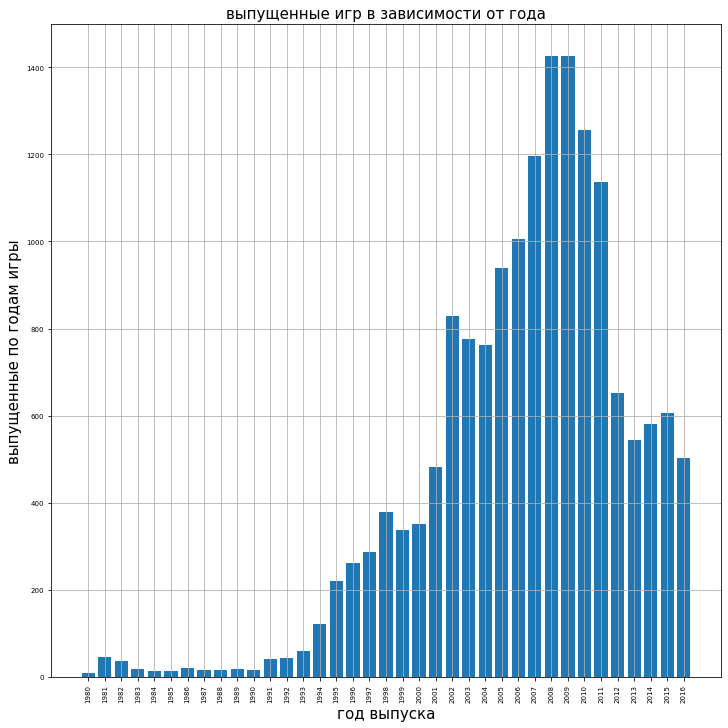

In [401]:
fig, ax = plt.subplots()

x = game_in_year['year_of_release']
y = game_in_year['number_of_games']


ax.bar(x, y)
ax.grid(True)


fig.set_figheight(12)
fig.set_figwidth(12)

plt.xticks(x, rotation = 90)

ax.set_xlabel('год выпуска', fontsize = 15)
ax.set_ylabel('выпущенные по годам игры', fontsize = 15)
ax.set_title('выпущенные игр в зависимости от года', fontsize = 15);

После вызова describe() считаем, что период выпуска игр до 1989 вообще не важен. Можно "повысить планку" и не брать во внимание период до 2001 года включительно согласно столбчатой диаграмме, тк количесво игр по годам ранее 2001 меньше, выпущенных позднее, и можно отбросить это смещение графика. Спад после 2009 года возможно связан с кризисом 2008, когда все акции упали, в том числе в этой индустрии. После того, как прошли сокращения и закрытия, игр стало меньше, их качество могло снизиться из-за издержек, прибыли от них меньше. Согласно сайту DTF в 2013 и 2015 гг, например, попытки выпускать новые части проходили без особого успеха и масштаба.

### Рассмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами за все время существования

In [402]:
sales_by_platform = df.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').reset_index()
sales_by_platform.sort_values('sum_sales', ascending=False)

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.76
15,PS,725.67
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [403]:
sales_by_platform.describe()

,sum_sales
count,31.000000
mean,284.194516
std,343.878188
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


Возьмем для анализа часть таблицы после Q3, обосновывая "лучшие платформы" показателями выше 75 % (301.205 млн копий) общей массы

построим распределение по годам для данных платформ и определим за какой срок появляются новые и исчезают старые платформы

In [404]:
q = sales_by_platform['sum_sales'].quantile(0.75)
sales_by_platform = sales_by_platform.loc[sales_by_platform['sum_sales'] >= q]
sales_by_platform

,platform,sum_sales
4,DS,802.76
6,GBA,312.88
15,PS,725.67
16,PS2,1233.56
17,PS3,931.34
18,PS4,314.14
26,Wii,891.18
28,X360,961.24


In [405]:
list = sales_by_platform['platform'].unique().tolist() # список платформ с наивысшими показателями продаж
list

['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']

In [406]:
df_pivot_platform = df.query("platform in list") # выбор из всей таблицы платформ с наивысшими показателями продаж выше Q3

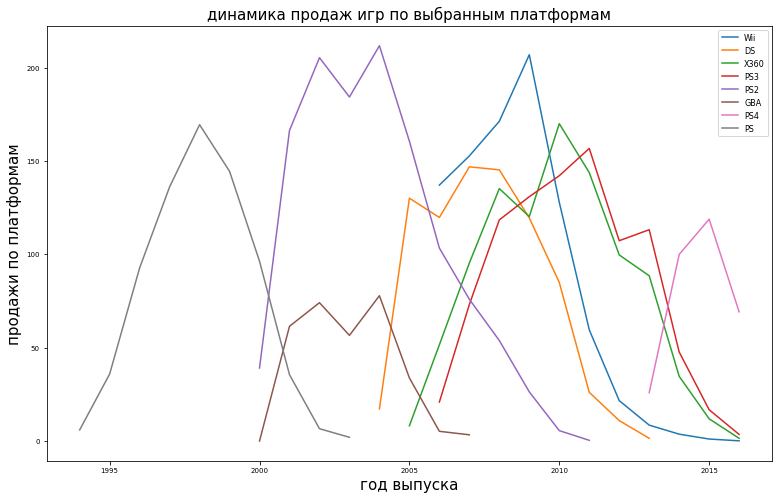

In [407]:
plt.figure(figsize=(13, 8))
ax = sns.lineplot(x='year_of_release', y='sum_sales', hue='platform', data=df_pivot_platform, estimator='sum', ci=None)
ax.set_xlabel('год выпуска', fontsize = 15)
ax.set_ylabel('продажи по платформам', fontsize = 15)
ax.set_title('динамика продаж игр по выбранным платформам', fontsize = 15)
plt.legend(prop={'size':8});

из графика по выбранным платформам видно, что время появления новых патформ соответствует моменту ухода с рынка предыдущих (что соответтвует здравому смыслу). Платформы появлялись группами:
- 1994;
- 2000;
- 2004-2006

Платформы исчезают постепенно, характерный срок, за который они исчезают, составляет около 7-8 лет (ширина пиков для каждой платформы более 5 лет, а края попадают чаще всего в предыдущую и следующую пятилетки). Наибольшее время существования платформы - для PS2

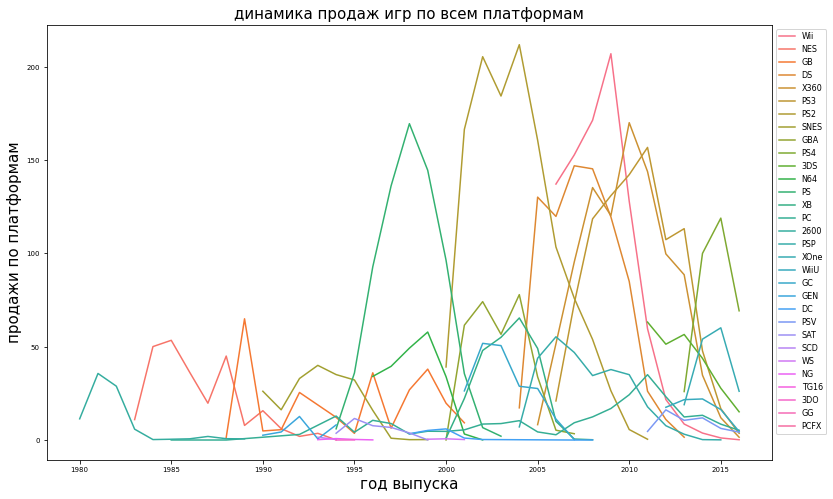

In [408]:
# график по всем платформам (весь срок существования платформ на рынке)
plt.figure(figsize=(13, 8))
ax = sns.lineplot(x='year_of_release', y='sum_sales', hue='platform', data=df, estimator='sum', ci=None)
plt.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size':8})
ax.set_xlabel('год выпуска', fontsize = 15)
ax.set_ylabel('продажи по платформам', fontsize = 15)
ax.set_title('динамика продаж игр по всем платформам', fontsize = 15);

Первые платформы, появившиеся на рынке до 1990 г, существовали очень долго (более 10 лет), далее смена и развитие платформ имееют большую динамику (в обзем сооветствующую предыдущему графику). Наиболее популярные платформы ожидаемо имееют более долгий "срок жизни".

### На основе данных последних лет определим платформы, лидирующие по продажам
С учетом того, что основной фактор для построения прогноза на 2017 год - актуальность данных, возьмем для анализа последние 2-3 года

In [409]:
last_three_years = df.query("year_of_release >= 2014")

In [410]:
last_years_sales_pivot = last_three_years.pivot_table(index=['platform', 'year_of_release', 'genre', 'rating'],
                values=['north_america_sales', 'europe_sales', 'japan_sales', 'other_sales', 'sum_sales'], 
                aggfunc='sum').reset_index()

In [411]:
last_years_sales_pivot.head()#платформы с 2014 с информацией о продажах в регионах и суммарных по годам

,platform,year_of_release,genre,rating,europe_sales,japan_sales,north_america_sales,other_sales,sum_sales
0,3DS,2014,action,E,0.25,0.00,0.32,0.05,0.62
1,3DS,2014,action,E10+,0.70,0.05,0.67,0.11,1.53
2,3DS,2014,action,M,0.02,0.08,0.10,0.01,0.21
3,3DS,2014,action,T,0.00,0.08,0.00,0.00,0.08
4,3DS,2014,action,unknown,0.24,0.78,0.14,0.04,1.20


In [412]:
sales_platform = last_three_years.pivot_table(index=['platform', 'year_of_release'],
                values='sum_sales', 
                aggfunc='sum').reset_index()

In [413]:
sales_platform.head()# суммарные по платформам за период с 2014 г

,platform,year_of_release,sum_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52


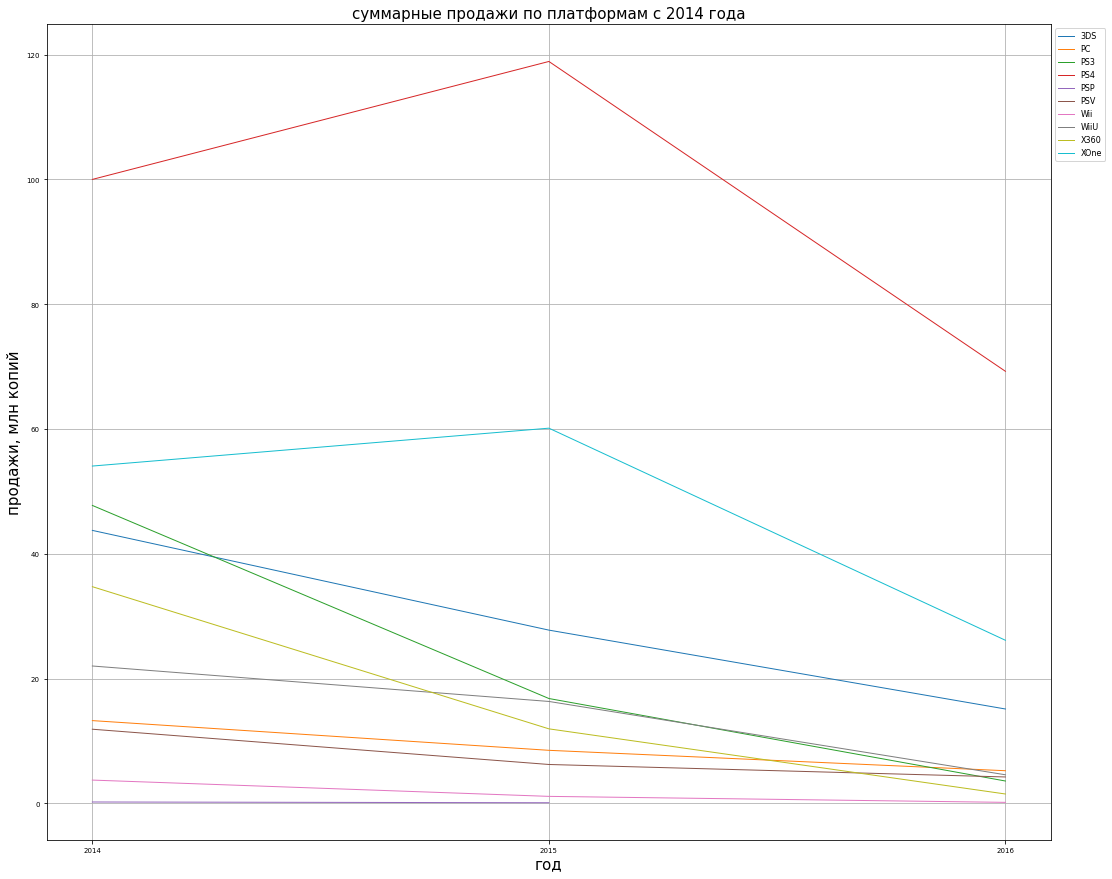

In [414]:
fig, ax = plt.subplots()

for platform in sales_platform['platform'].unique():
    x = sales_platform.loc[sales_platform['platform'] == platform, 'year_of_release']
    y = sales_platform.loc[sales_platform['platform'] == platform, 'sum_sales']

    line = ax.plot(x, y, '-', linewidth=1, label=platform)

  
ax.set_title('суммарные продажи по платформам с 2014 года', size=15)
ax.set_xlabel('год', fontsize = 15)
ax.set_ylabel('продажи, млн копий', fontsize = 15)
ax.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size':8})
ax.grid(True)

fig.set_figheight(15)
fig.set_figwidth(18)

plt.xticks(range(2014,2017))

plt.show();

Посмотрим на графике топ платформ по продажам (определено как выше Q1)

In [415]:
q = sales_platform['sum_sales'].quantile(0.25)

In [416]:
top_list_platform = sales_platform.loc[sales_platform['sum_sales'] > q]
top_list_platform

,platform,year_of_release,sum_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
9,PS4,2014,100.00
10,PS4,2015,118.90


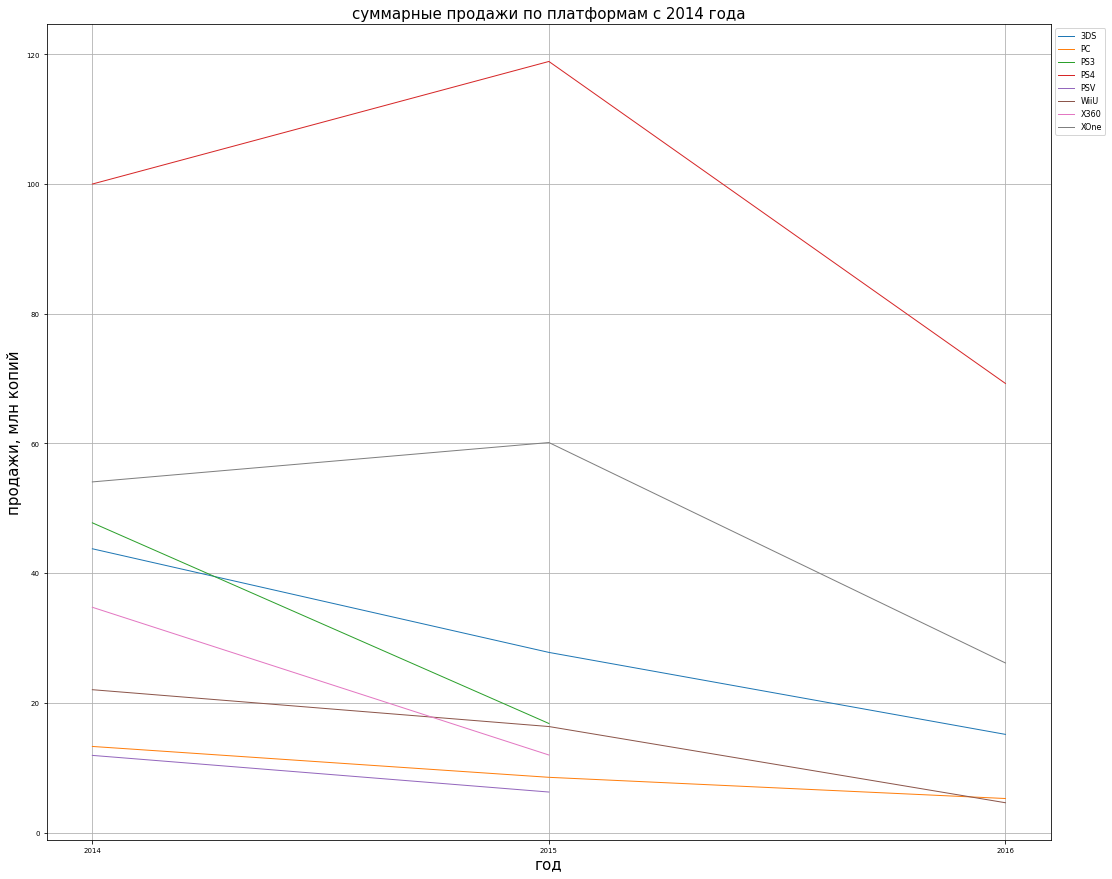

In [417]:
fig, ax = plt.subplots()

for platform in top_list_platform['platform'].unique():
    x = top_list_platform.loc[top_list_platform['platform'] == platform, 'year_of_release']
    y = top_list_platform.loc[top_list_platform['platform'] == platform, 'sum_sales']

    line = ax.plot(x, y, '-', linewidth=1, label=platform)

  
ax.set_title('суммарные продажи по платформам с 2014 года', size=15)
ax.set_xlabel('год', size=15)
ax.set_ylabel('продажи, млн копий', size=15)
ax.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size':8})
ax.grid(True)

fig.set_figheight(15)
fig.set_figwidth(18)

plt.xticks(range(2014,2017))

plt.show();

In [418]:
top_list_platform = top_list_platform.query('year_of_release != 2016') # исключим 2016, так как данные за 2016 год неполные, 
# и делать вывод о падении продаж в 2016 году не стоит

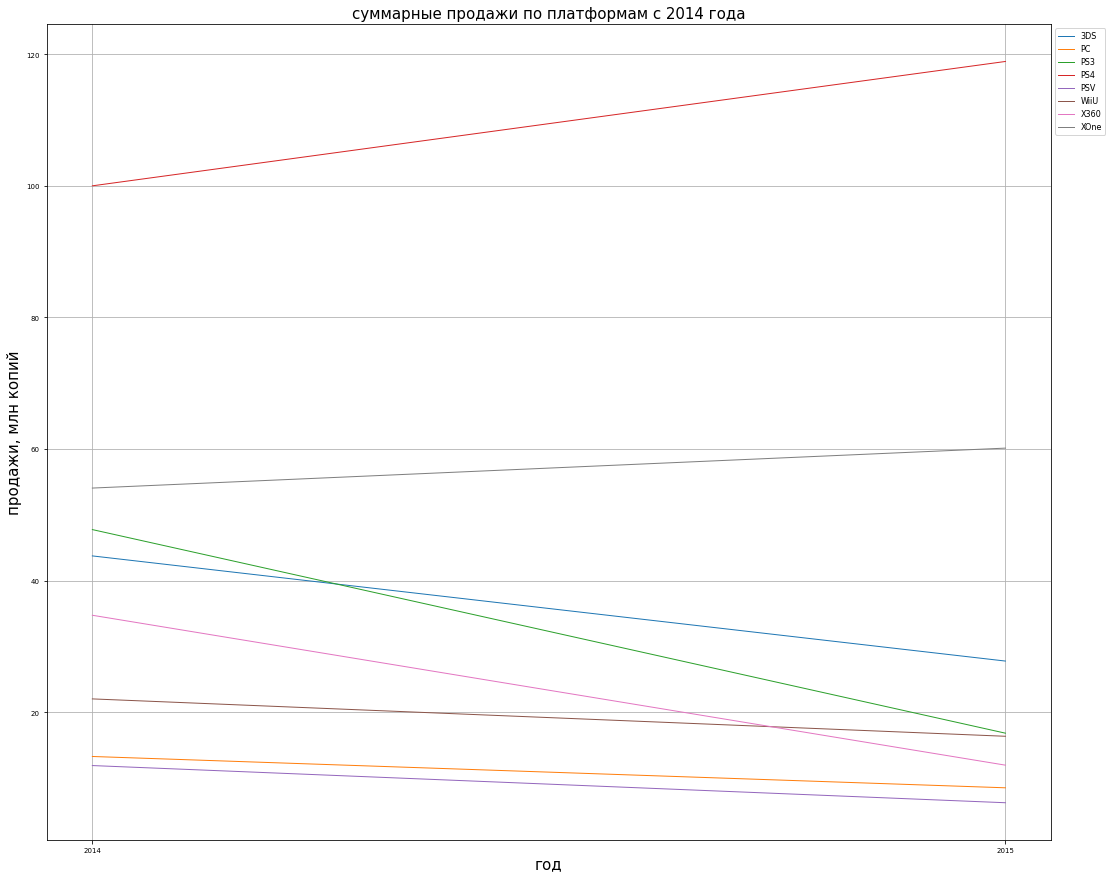

In [419]:
fig, ax = plt.subplots()

for platform in top_list_platform['platform'].unique():
    x = top_list_platform.loc[top_list_platform['platform'] == platform, 'year_of_release']
    y = top_list_platform.loc[top_list_platform['platform'] == platform, 'sum_sales']

    line = ax.plot(x, y, '-', linewidth=1, label=platform)

  
ax.set_title('суммарные продажи по платформам с 2014 года', size=15)
ax.set_xlabel('год', size=15)
ax.set_ylabel('продажи, млн копий', size=15)
ax.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size':8})
ax.grid(True)

fig.set_figheight(15)
fig.set_figwidth(18)

plt.xticks(range(2014,2016))

plt.show();

Рассмотрим период с 2014 по 2015 для выбранных платформ. Из графика видно, что возрастающие продажи присущи PS4 и XOne, для остальных платформ продажи падают. После них уверенно на рынке себя чувствует 3DS как по объемам продаж, так и по уровню их снижения. Хорошая динамика у WiiU (возможно, она также станет возрастающей при изменении графика для Wii и ее ухода в дальнейшем). В плане продаж также не остает PS3, для которой график убывающий, но не уходящий в 0 для рассматриваемого периода, так что на данную платформу стоит ориентироваться. Для PC график выглядит стабильным, как для диапазона 2014-2015, так и к 2016 году. PSV с 2014 по 2015 год имеет из выбранных продажи 15 млн копий и менее, н если исходить из утверждения, что даже на падающих продажах можно заработать (когда объем составляет около 15-20 млн. копий), на PSV, наверное, уже не стоит ориентироваться. X360 с ее падением к 2015 году оказалась на границе

Таким образом, стоит выделить PS4, XONE, 3DS, PS3, WiiU, X360, PC

In [420]:
df.loc[df['platform'] == "3DS", 'year_of_release'].max() - df.loc[df['platform'] == "3DS", 'year_of_release'].min()

5

In [421]:
df.loc[df['platform'] == "XOne", 'year_of_release'].max() - df.loc[df['platform'] == "XOne", 'year_of_release'].min()

3

In [422]:
df.loc[df['platform'] == "WiiU", 'year_of_release'].max() - df.loc[df['platform'] == "WiiU", 'year_of_release'].min()

4

In [423]:
df.loc[df['platform'] == "X360", 'year_of_release'].max() - df.loc[df['platform'] == "X360", 'year_of_release'].min()

11

In [424]:
df.loc[df['platform'] == "PS3", 'year_of_release'].max() - df.loc[df['platform'] == "PS3", 'year_of_release'].min()

10

Однако, платформам X360 и PS3 из рекомендации уже по 10-11 лет или около того, их срок активных продаж уже закончен

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Данные для построения также принимаются за период с 2014 года

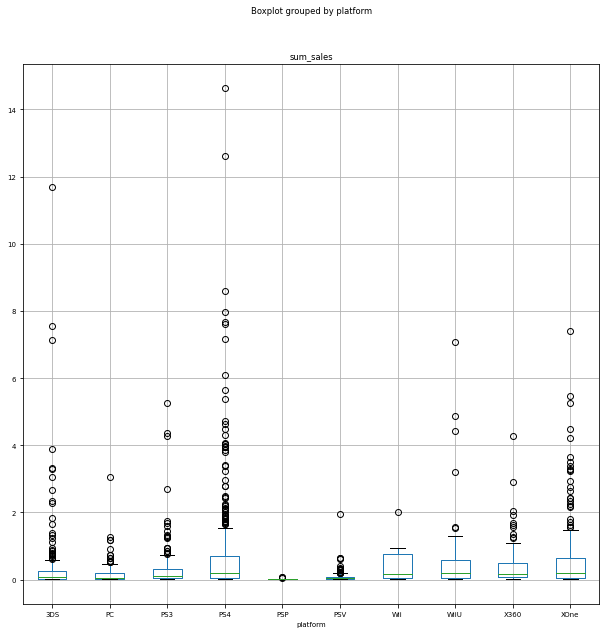

In [425]:
ax = last_three_years.boxplot(column='sum_sales', by='platform', grid=True, figsize=(10,10))

plt.show()

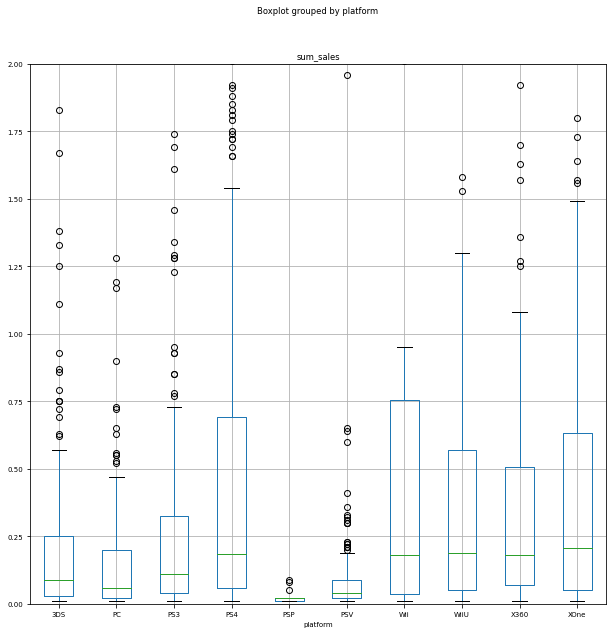

In [426]:
ax = last_three_years.boxplot(column='sum_sales', by='platform', grid=True, figsize=(10,10))
ax.set_ylim([0, 2])

plt.show()

по боксплотам видно, что за границами усов много выбросов - игр, которые продаются в таком количестве, что сильно выбиваются, и делают единично высокие продажи: например для платформ 3DS, PS4, XOne. Если смотреть на сами ящики, то видно, что 3DS "вывез" на как раз на том, что "выстрелело", тк граница усов около 0,6, тогда как для PS4, WiiU и XOne она выше 1,25. Также если сравнивать медианный значения, 3DS выпадает из списка ТОП. По медианным значениям можно выделить три "типа" платорм:
- PS4;
- Wii/WiiU;
- X360/XOne.

остальные платформы просто "имеют право на существование" (грубо говоря)

### Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
По графикам можно выделить две платформы: PS4 и XOne. Построим для них диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

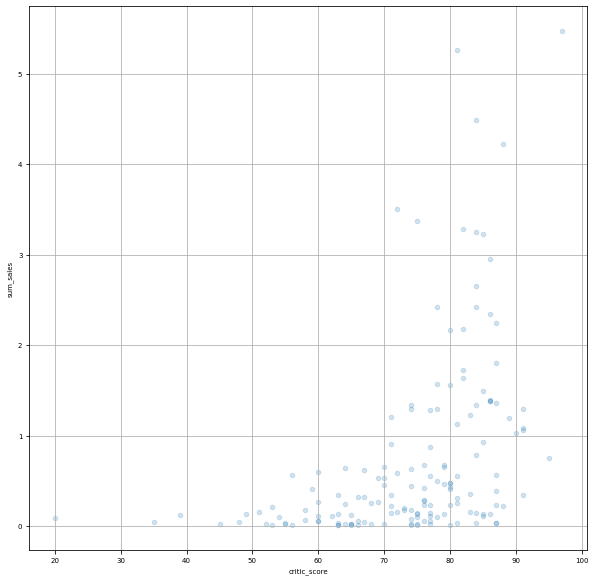

In [427]:
(
    last_three_years.query('platform == "XOne"')
             .plot(x='critic_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

из диаграммы по оценкам критиков видно, что с оценкой выше 70 игр больше. в общей массе продажи немного связаны с оценкой критиков свыше 70 баллов - заметно возрастание по оси Y

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

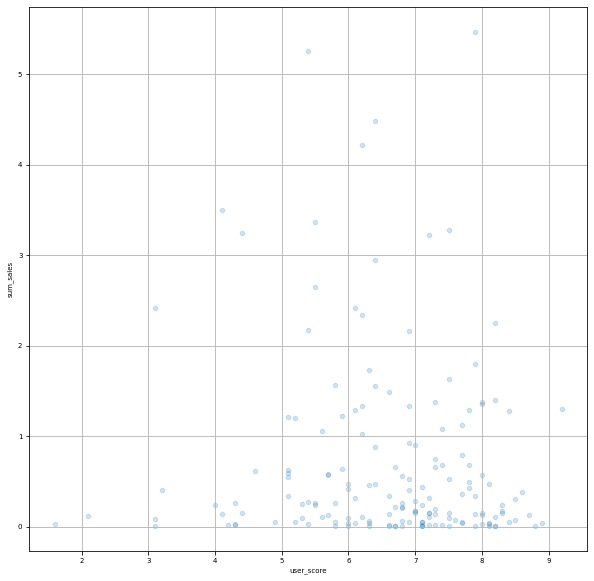

In [428]:
(
    last_three_years.query('platform == "XOne"')
             .plot(x='user_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

из диаграммы по оценкам пользователей также видно, что разброс большой, зависимости практически нет, большая часть распределена за оценкой 5

In [429]:
last_three_years.loc[df['platform'] == 'X360', ['sum_sales', 'user_score', 'critic_score']].corr()
#рассчитаем корреляцию между отзывами и продажами PS3

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.138445,0.525723
user_score,-0.138445,1.000000,0.625309
critic_score,0.525723,0.625309,1.000000


по коэффициентам видно, что оценка критиков имеет незначительное влияние на продажи (коэффициент 0,53), оценка пользователей отрицательная близкая к 0 (- 0,14)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами PS4

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

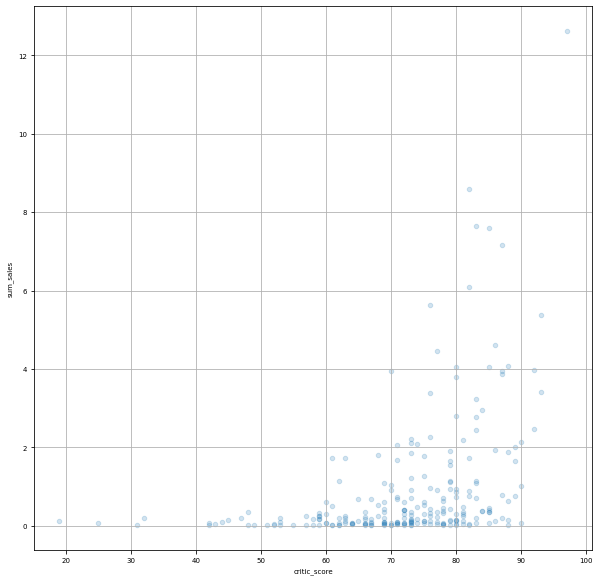

In [430]:
(
    last_three_years.query('platform == "PS4"')
             .plot(x='critic_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

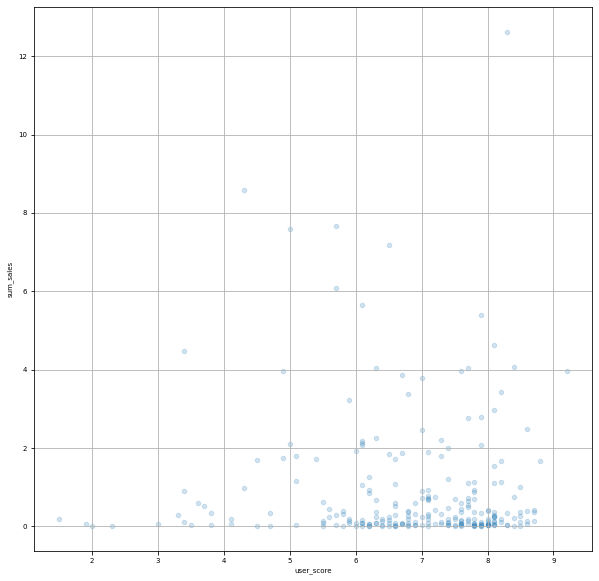

In [431]:
(
    last_three_years.query('platform == "PS4"')
             .plot(x='user_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

In [432]:
last_three_years.loc[df['platform'] == 'PS4', ['sum_sales', 'user_score', 'critic_score']].corr()
#рассчитаем корреляцию между отзывами и продажами PS4

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.040132,0.402661
user_score,-0.040132,1.000000,0.546434
critic_score,0.402661,0.546434,1.000000


по коэффициентам корреляции ситуация с PS4 не меняется

In [433]:
last_three_years.loc[:, ['sum_sales', 'user_score', 'critic_score']].corr()

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.01307,0.328105
user_score,-0.013070,1.00000,0.504460
critic_score,0.328105,0.50446,1.000000


В общем рассмотрении для всех продаж всех игр влияние оценки пользователя остается практически нулевым, влияние критиков также мало и составляет 0,33

### Посмотрим на продажи игр на других платформах

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

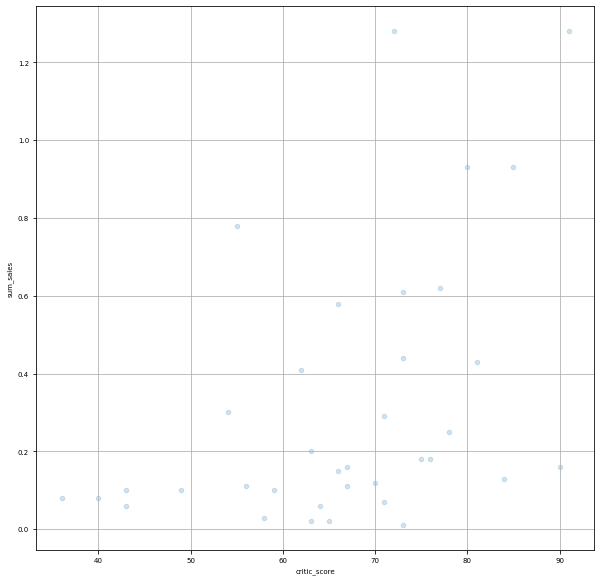

In [434]:
(
    last_three_years.query('platform == "PS3"')
             .plot(x='critic_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

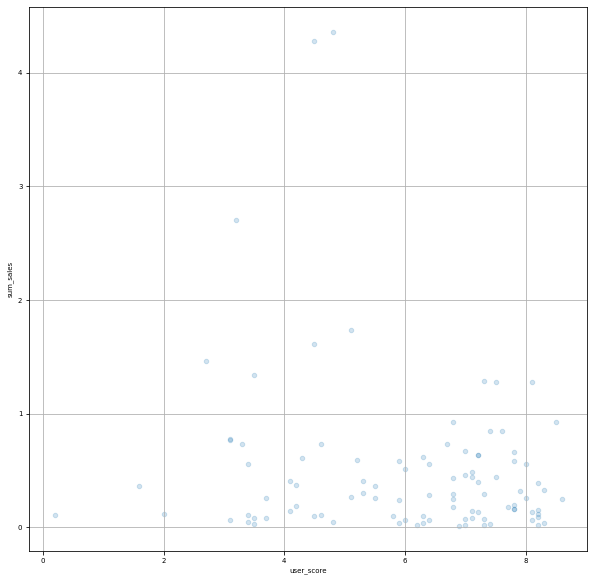

In [435]:
(
    last_three_years.query('platform == "PS3"')
             .plot(x='user_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

In [436]:
last_three_years.loc[df['platform'] == 'PS3', ['sum_sales', 'user_score', 'critic_score']].corr()
#рассчитаем корреляцию между отзывами и продажами PS4

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.166761,0.446575
user_score,-0.166761,1.000000,0.693445
critic_score,0.446575,0.693445,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

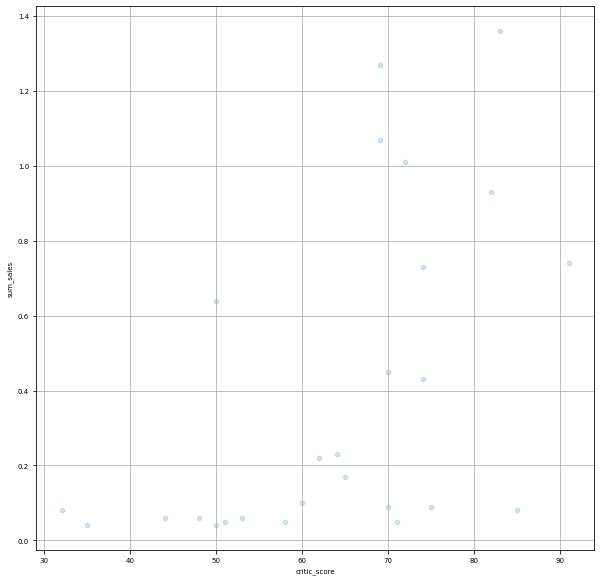

In [437]:
(
    last_three_years.query('platform == "X360"')
             .plot(x='critic_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

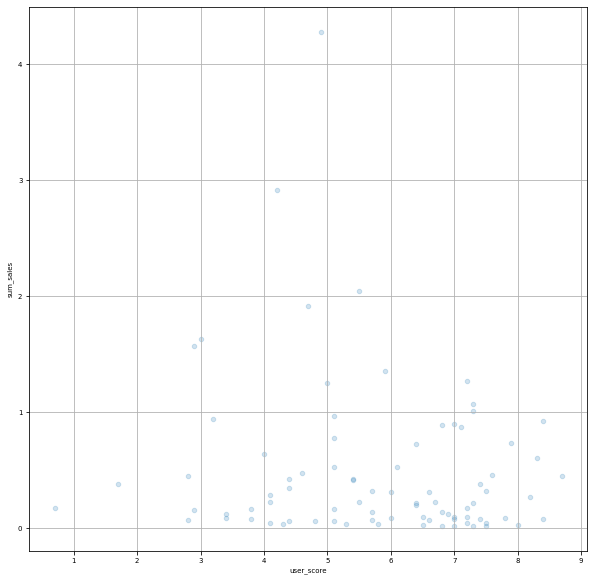

In [438]:
(
    last_three_years.query('platform == "X360"')
             .plot(x='user_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

In [439]:
last_three_years.loc[df['platform'] == 'X360', ['sum_sales', 'user_score', 'critic_score']].corr()
#рассчитаем корреляцию между отзывами и продажами PS4

,sum_sales,user_score,critic_score
sum_sales,1.000000,-0.138445,0.525723
user_score,-0.138445,1.000000,0.625309
critic_score,0.525723,0.625309,1.000000


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

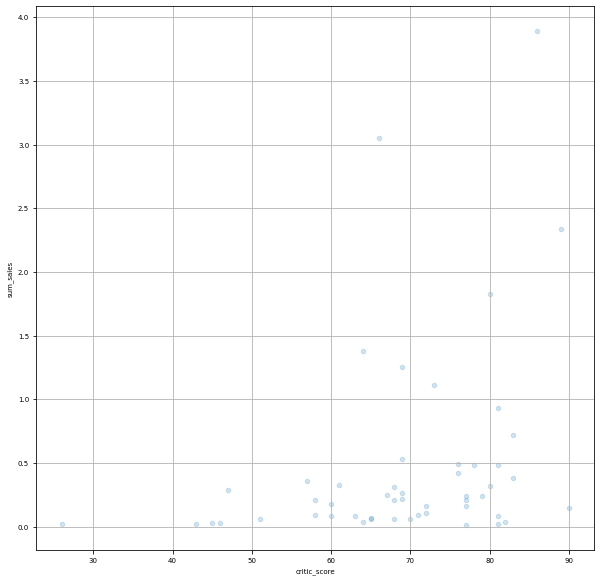

In [440]:
(
    last_three_years.query('platform == "3DS"')
             .plot(x='critic_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.2, legend=True)
)

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

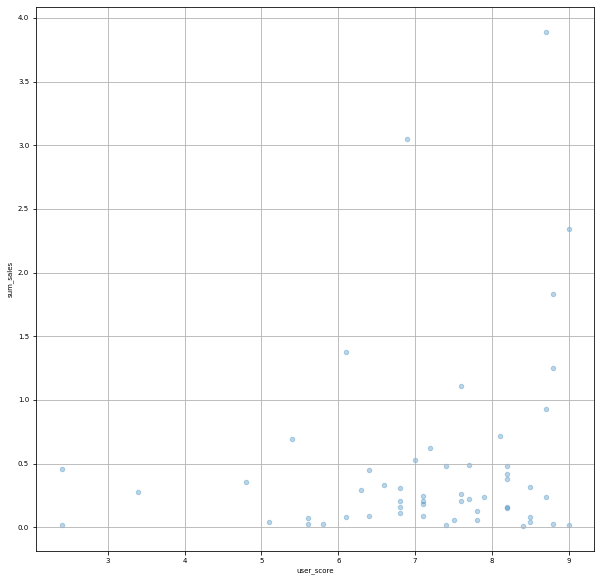

In [441]:
(
    last_three_years.query('platform == "3DS"')
             .plot(x='user_score', y='sum_sales', grid=True, figsize=(10, 10), 
                   kind='scatter', alpha=0.3, legend=True)
)

In [442]:
last_three_years.loc[df['platform'] == '3DS', ['sum_sales', 'user_score', 'critic_score']].corr()
#рассчитаем корреляцию между отзывами и продажами PS4

,sum_sales,user_score,critic_score
sum_sales,1.000000,0.215193,0.314117
user_score,0.215193,1.000000,0.862485
critic_score,0.314117,0.862485,1.000000


Диаграммы рассеяния и коэффициенты корреляции не дают однозначного ответа. Коэффициенты для зависимости оценка/объем продаж различны внутри разных платформ, а также отличаются от коэффициента для всех рассматриваемых данных. Мы не сможем оценить какие действия повлияли на рост продаж в рамках проекта.

Есть одна цитата: "Мы на самом деле заметили, что продажи совершенно не коррелируются с оценками пользователей. Это очень пугает разработчиков, когда оценка плохая, а продажи идут. Сидишь и вытираешь слёзы деньгами.

Алекс Ничипорчик, CEO tinyBuild"

### Посмотрим на общее распределение игр по жанрам

Возьмем также актуальный период с 2012 года

In [443]:
genre_sales = (last_three_years
               .pivot_table(index='genre', aggfunc={'sum_sales': 'sum'})
               .reset_index())

genre_sales.columns = ['genre', 'sum_sales']

In [444]:
genre_sales.sort_values(by='sum_sales', ascending=False)

,genre,sum_sales
0,action,199.36
8,shooter,170.94
10,sports,109.48
7,role-playing,101.44
3,misc,37.55
2,fighting,28.22
6,racing,27.52
4,platform,18.09
1,adventure,17.55
9,simulation,13.13


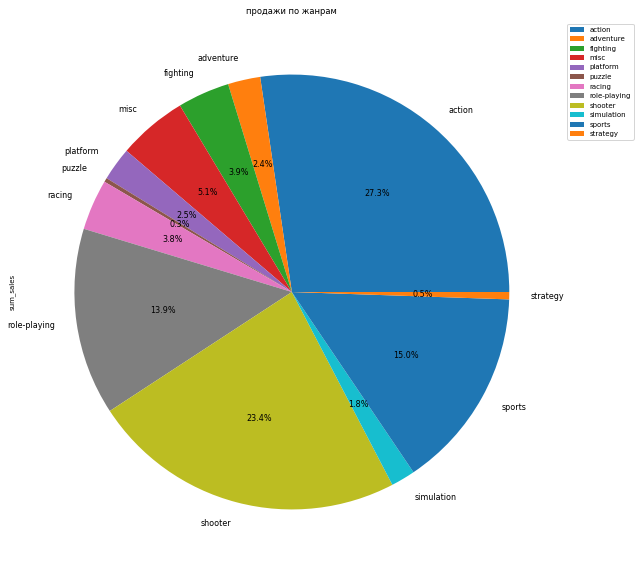

In [445]:
(
    last_three_years.pivot_table(index='genre', 
                                  values='sum_sales', aggfunc='sum').
    plot(y='sum_sales', 
         grid=True, 
         figsize=(10,10), 
         kind='pie', 
         title='продажи по жанрам', 
         autopct='%1.1f%%', 
         textprops={'fontsize': 8})
)

plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

По диаграмме видно, что наибольшую долю продаж за последние 3 рассматриваемых года занимают игры жанра action - 27,3 %, далее следует shooter - 23,4 %, затем sports и role-laying в примерно одинковой доле - 15 и 13,9 % соответственно. Остальные жанры сильно "в минусе" по популярности - от 5,1 до 1,8 %, паззлы по продажам оказались около 0

Построим аналогичную куговую диаграмму за весь период в таблице

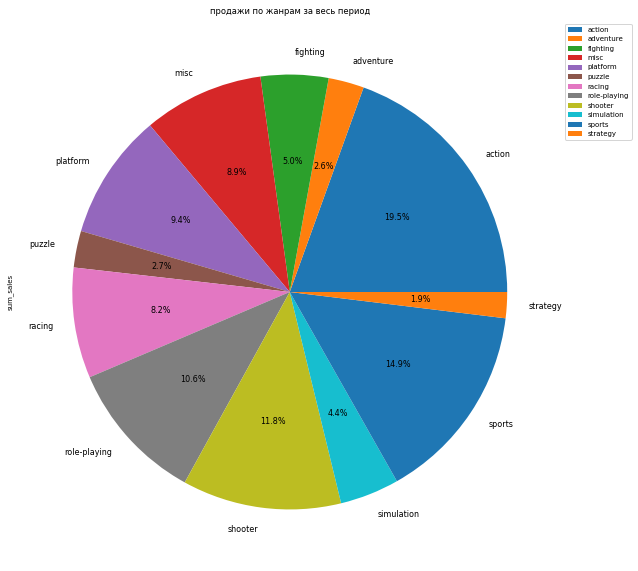

In [446]:
(
    df.pivot_table(index='genre', 
                                  values='sum_sales', aggfunc='sum').
    plot(y='sum_sales', 
         grid=True, 
         figsize=(10,10), 
         kind='pie', 
         title='продажи по жанрам за весь период', 
         autopct='%1.1f%%', 
         textprops={'fontsize': 8})
)

plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

Построим диаграмму размаха для продаж по жанрам

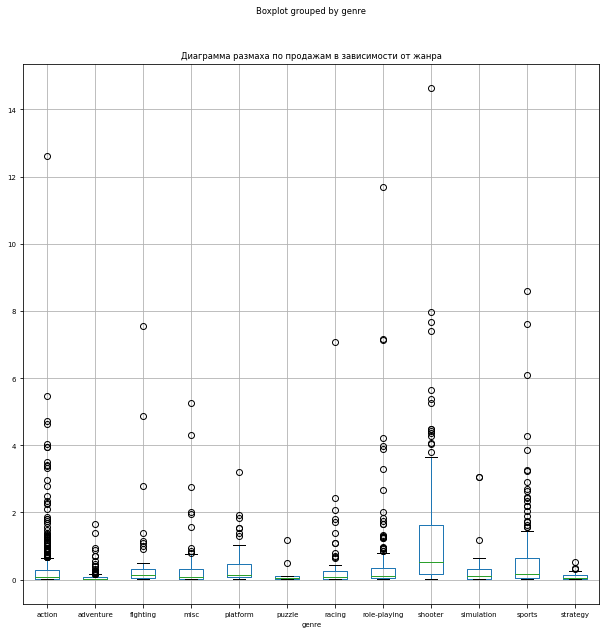

In [447]:
ax = last_three_years.boxplot(column='sum_sales', by='genre', grid=True, figsize=(10,10))
ax.set_title('Диаграмма размаха по продажам в зависимости от жанра')
plt.show()

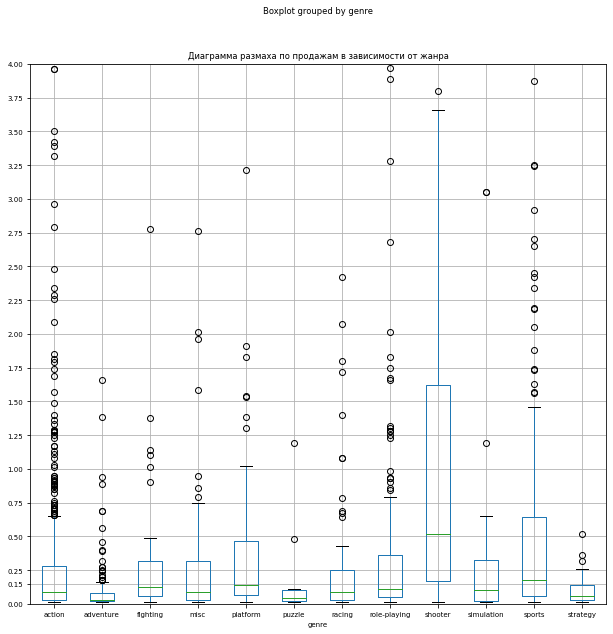

In [448]:
ax = last_three_years.boxplot(column='sum_sales', by='genre', grid=True, figsize=(10,10))
ax.set_ylim([0, 4])
ax.set_title('Диаграмма размаха по продажам в зависимости от жанра')
ax.set_yticks([0, 0.15, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4])
plt.show()

По диаграмме размаха можно сделать вывод о том, что самыми успешными являются игры жанра shooter, а action по Q2 и Q3 намного ниже в плане продаж относительно шутеров. Кроме того по Q3 action также ниже fighting, misc., platform, role-playing, simulation и  sports, что говорит о том, что среди жанра action достаточно топовых игр, делающих продажи, но сам по себе жанр  по стабильности и заинтересованности пользователей далеко не является лидирующим. С role-playing ситуация аналогичная, свою долю вносят выбросы, доходящие до 12. Среди устойчивых после shooter'ов следует выделять sports, platform и  fighting

По результатам блока исследовательского анализа:

- выбран актуальный период для дальнейшего анализа - с 2014 года;
- выявлено, что каждые 7-8 лет платформы уходят с рынка, тк какждый 5 лет выпускаются новые;
- "растущими" платформами пределены PS4 и XOne;
- выявлено, что нет прямой связи между оценками пользователей и продажами, оценки критиков имеют незначительное значение;
- выявлено, что самый продаваемые жанры с 2014 года - action и shooter. Но action занимает лидирующие позиции только с учетом высокопризнанных и высокопродаваемых игр. Однако, ставки стоит делать на стабильность, и обратить внимание в первую очередь на жанр shooter

## Составление портрета пользователя каждого региона

Определим для каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) и их различия в долях продаж.
- Самые популярные жанры (топ-5) и разница между ними
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

Необходимые данные по продажам в регионах с 2014 года ранее были сведены в таблицу last_years_sales_pivot

In [449]:
last_years_sales_pivot.head()

,platform,year_of_release,genre,rating,europe_sales,japan_sales,north_america_sales,other_sales,sum_sales
0,3DS,2014,action,E,0.25,0.00,0.32,0.05,0.62
1,3DS,2014,action,E10+,0.70,0.05,0.67,0.11,1.53
2,3DS,2014,action,M,0.02,0.08,0.10,0.01,0.21
3,3DS,2014,action,T,0.00,0.08,0.00,0.00,0.08
4,3DS,2014,action,unknown,0.24,0.78,0.14,0.04,1.20


Северная Америка

In [450]:
platform_america = last_years_sales_pivot.pivot_table(index='platform', 
                                                      aggfunc={'north_america_sales':'sum'}).reset_index()

In [451]:
platform_america.sort_values('north_america_sales', ascending=False)

,platform,north_america_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05
7,WiiU,19.36
1,PC,7.23
5,PSV,2.52
6,Wii,2.08
4,PSP,0.00


In [452]:
for platform in platform_america['platform'].unique():
    platform_america.loc[(platform_america['platform'] == platform) & 
                       (platform_america['north_america_sales'] < 22), 'platform'] = 'другие'

In [453]:
platform_america_top = platform_america.sort_values('north_america_sales', ascending=False)
platform_america_top

,platform,north_america_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05
7,другие,19.36
1,другие,7.23
5,другие,2.52
6,другие,2.08
4,другие,0.00


In [454]:
platform_america_top = (
    platform_america_top
    .pivot_table(index='platform', aggfunc={'north_america_sales': 'sum'})
    .reset_index()
    .sort_values('north_america_sales', ascending=False)
)
platform_america_top

,platform,north_america_sales
2,PS4,98.61
4,XOne,81.27
5,другие,31.19
3,X360,28.30
0,3DS,22.64
1,PS3,22.05


Европа

In [455]:
platform_europe = last_years_sales_pivot.pivot_table(index='platform', aggfunc={'europe_sales':'sum'}).reset_index()

In [456]:
platform_europe.sort_values('europe_sales', ascending=False)

,platform,europe_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12
8,X360,15.49
7,WiiU,13.15
5,PSV,3.53
6,Wii,2.59
4,PSP,0.00


In [457]:
for platform in platform_europe['platform'].unique():
    platform_europe.loc[(platform_europe['platform'] == platform) & 
                       (platform_europe['europe_sales'] < 16), 'platform'] = 'другие'

In [458]:
platform_europe_top = platform_europe.sort_values('europe_sales', ascending=False)
platform_europe_top

,platform,europe_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12
8,другие,15.49
7,другие,13.15
5,другие,3.53
6,другие,2.59
4,другие,0.00


In [459]:
platform_europe_top = (
    platform_europe_top
    .pivot_table(index='platform', aggfunc={'europe_sales': 'sum'})
    .reset_index()
    .sort_values('europe_sales', ascending=False)
)
platform_europe_top

,platform,europe_sales
3,PS4,130.04
4,XOne,46.25
5,другие,34.76
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


Япония

In [460]:
platform_japan = last_years_sales_pivot.pivot_table(index='platform', 
                                                    aggfunc={'japan_sales':'sum'}).reset_index()

In [461]:
platform_japan.sort_values('japan_sales', ascending=False)

,platform,japan_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31
4,PSP,0.36
9,XOne,0.32
8,X360,0.08
1,PC,0.00
6,Wii,0.00


In [462]:
for platform in platform_japan['platform'].unique():
    platform_japan.loc[(platform_japan['platform'] == platform) & 
                       (platform_japan['japan_sales'] < 7), 'platform'] = 'другие'

In [463]:
platform_japan_top = platform_japan.sort_values('japan_sales', ascending=False)
platform_japan_top

,platform,japan_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31
4,другие,0.36
9,другие,0.32
8,другие,0.08
1,другие,0.00
6,другие,0.00


In [464]:
platform_japan_top = (
    platform_japan_top
    .pivot_table(index='platform', aggfunc={'japan_sales': 'sum'})
    .reset_index()
    .sort_values('japan_sales', ascending=False)
)
platform_japan_top

,platform,japan_sales
0,3DS,44.24
2,PS4,15.02
3,PSV,14.54
1,PS3,11.22
4,WiiU,7.31
5,другие,0.76


Построим по платформам в регионах столбчатые и круговые диаграммы

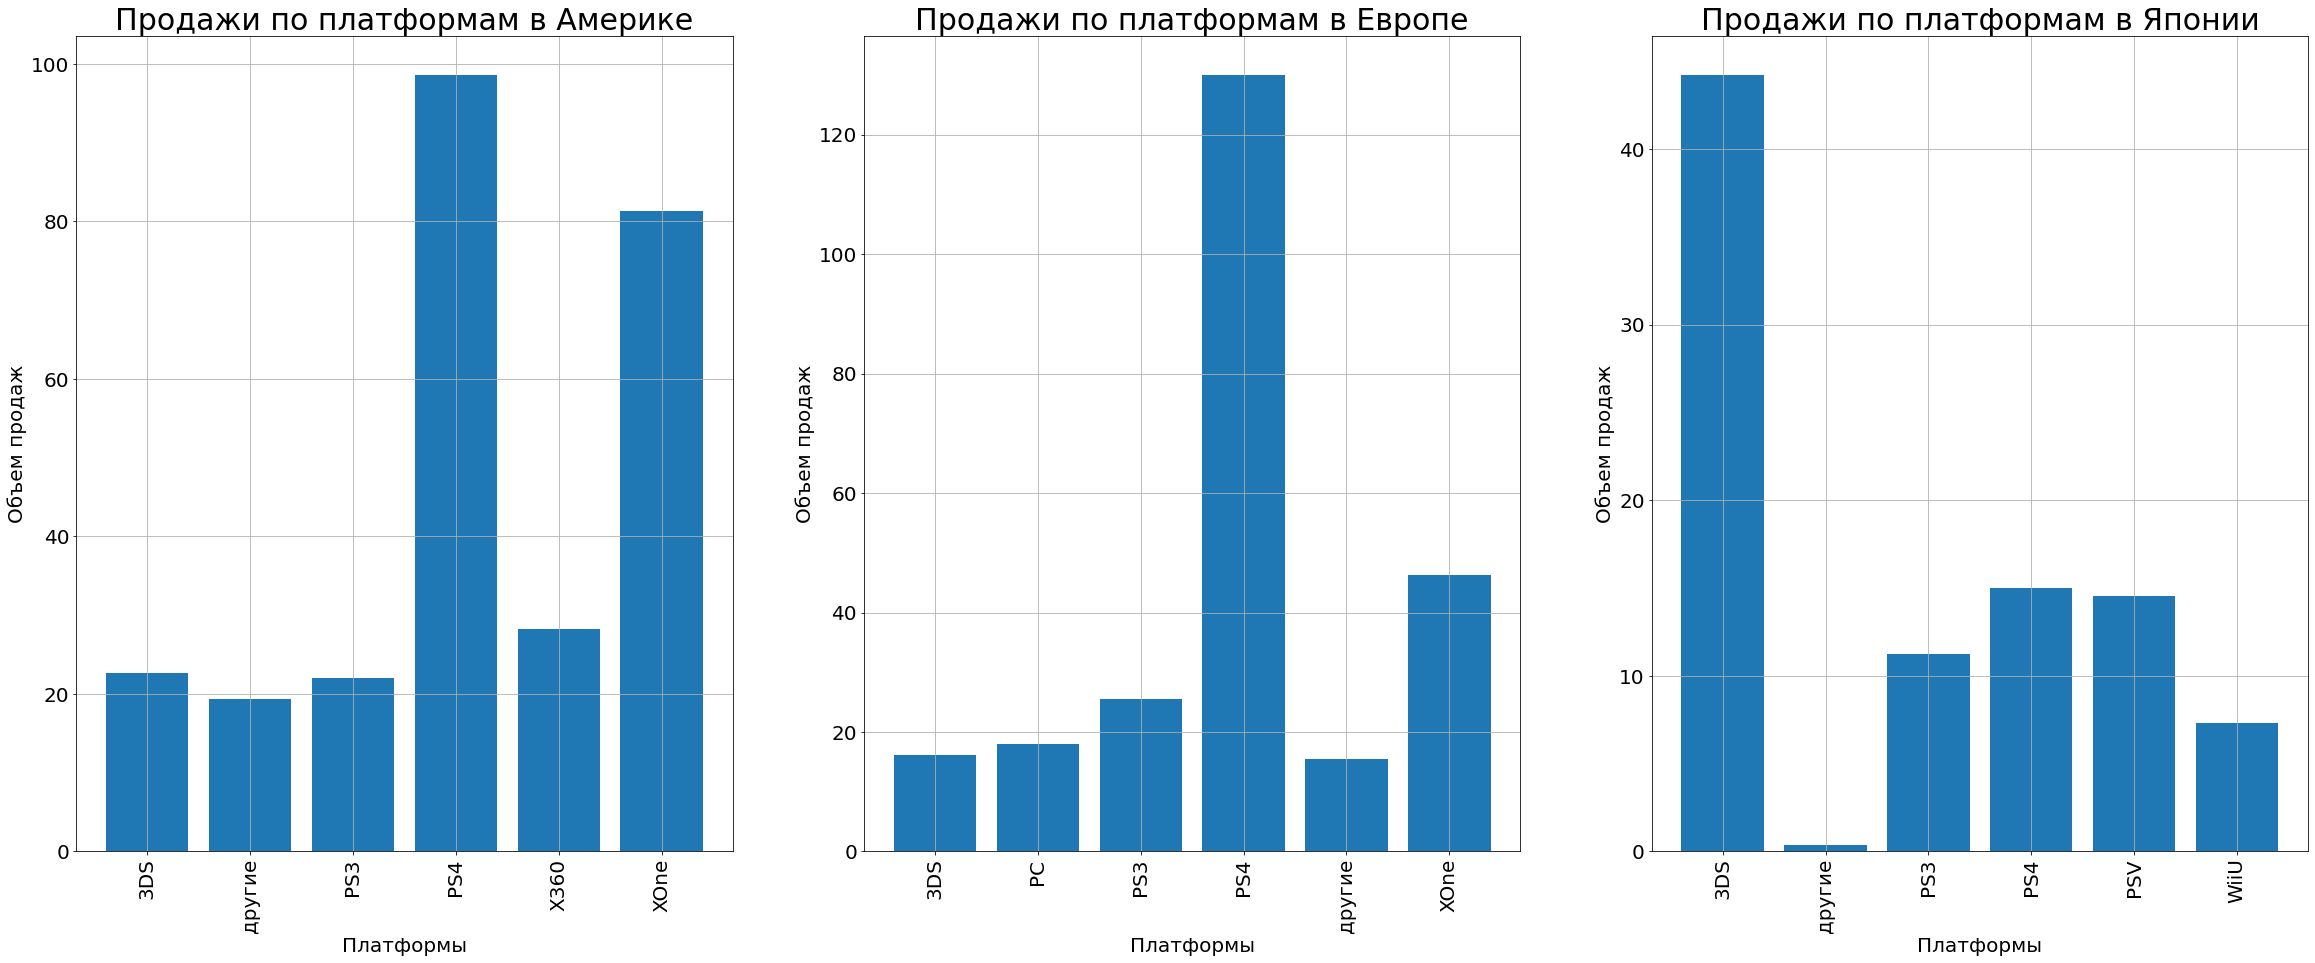

In [490]:
fig = plt.figure(figsize=(40,15))

x1 = platform_america['platform']
y1 = platform_america['north_america_sales']

x2 = platform_europe['platform']
y2 = platform_europe['europe_sales']

x3 = platform_japan['platform']
y3 = platform_japan['japan_sales']

   

ax1 = plt.subplot(1, 3, 1)
plt.bar(x1, y1)
ax1.set_title('Продажи по платформам в Америке', fontsize=30)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)

ax2 = plt.subplot(1, 3, 2)
plt.bar(x2, y2)
ax2.set_title('Продажи по платформам в Европе', fontsize=30)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)

ax3 = plt.subplot(1, 3, 3)
plt.bar(x3, y3)
ax3.set_title('Продажи по платформам в Японии', fontsize=30)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.set_xlabel('Платформы', fontsize=20)
    ax.set_ylabel('Объем продаж', fontsize=20)
    ax.grid();

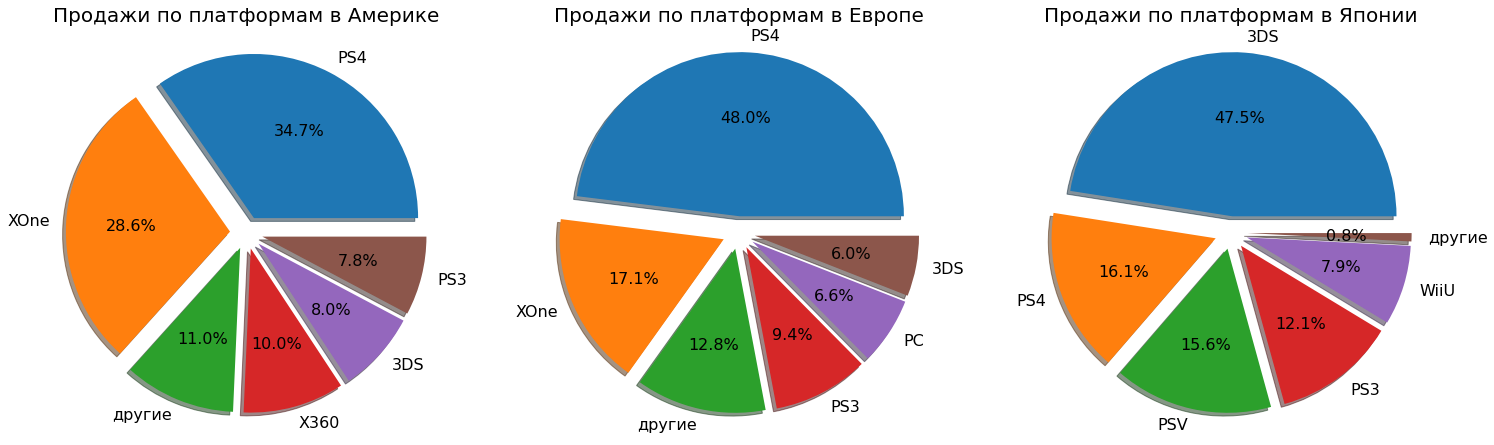

In [466]:
fig = plt.figure(figsize=(25, 25))

x1 = platform_america_top['platform']
y1 = platform_america_top['north_america_sales']
labels1=platform_america_top['platform']

x2 = platform_europe_top['platform']
y2 = platform_europe_top['europe_sales']
labels2=platform_europe_top['platform']

x3 = platform_japan_top['platform']
y3 = platform_japan_top['japan_sales']
labels3=platform_japan_top['platform']
 
explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

ax1 = plt.subplot(1, 3, 1)
plt.pie(y1, labels=labels1, autopct='%1.1f%%', textprops={'fontsize': 16}, explode=explode, shadow=True)
ax1.set_title('Продажи по платформам в Америке', fontsize=20)

ax2 = plt.subplot(1, 3, 2)
plt.pie(y2, labels=labels2, autopct='%1.1f%%', textprops={'fontsize': 16}, explode=explode, shadow=True)
ax2.set_title('Продажи по платформам в Европе', fontsize=20)


ax3 = plt.subplot(1, 3, 3)
plt.pie(y3, labels=labels3, autopct='%1.1f%%', textprops={'fontsize': 16}, explode=explode, shadow=True)
ax3.set_title('Продажи по платформам в Японии', fontsize=20);

В топ-5 платформ Северной Америки входят 3DS, PS3, PS4, X360, XOne. При этом, лидирцющей является PS4 - 35 %, далее XOne (28.6 %)

В топ-5 платформ Европы входят 3DS, PS3, PS4, PC, XOne. При этом, лидирцющей является PS4 - на нее приходится 48 %, далее следует XOne - 17.1 %, затем PS3 - 9.4 %

В топ-5 Японии входят 3DS, PS3, PS4, PSV, WiiU. При этом, лидирующей является 3DS - на нее приходится 47.5 %, далее следует PS4 - 16.1 %, затем PSV - 15.6 %, PS3 - 12.1 %, WiiU - 7.9 %.
Если сравнивать распределение платформ по странам, то очевидно, что страны очень сильно отличаются, особенно Япония с лидером 3DS, WiiU в списке и не очень большой популярностью PS4


из графиков выше видно как отличаются рынки в америке, европе и японии по популярности платформ общей для первых двух рынков является PS4, объемы по другим разнятся, к тому же, на рынке европы присутствует PC, которой нет в ТОП-5 для Америки

Япония отличается от предыдущих двух регионов: лидером является 3DS, а также в ТОП-5 платформ Японии входят платформы PSV и WiiU, на что стоит обратить внимание при прогнозировании успещности игр для данного региона

### Самые популярные жанры (топ-5) и разница между ними

In [467]:
genre_america = last_years_sales_pivot.pivot_table(index='genre', 
                                                   aggfunc={'north_america_sales':'sum'}).sort_values('north_america_sales', 
                                                                                                      ascending=False).head()

In [468]:
genre_america

,north_america_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


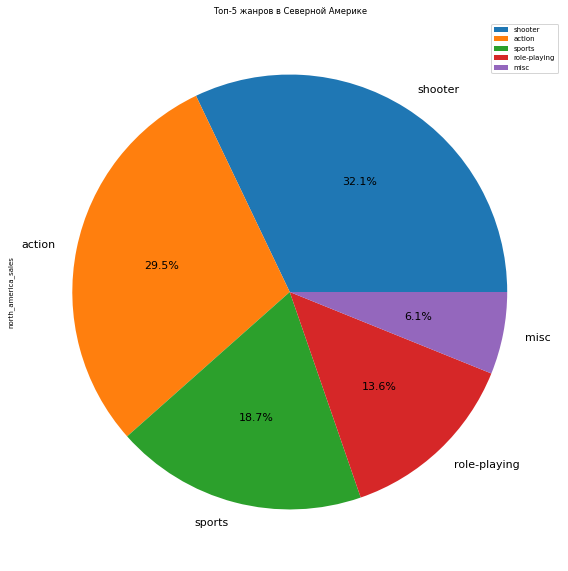

In [469]:
(
genre_america
    .plot(y='north_america_sales', grid=True, figsize=(10,10), kind='pie', 
          title='Топ-5 жанров в Северной Америке', autopct='%1.1f%%', textprops={'fontsize': 11})

);

В топ-5 жанров в Северной Америке входят action, shooter, sports, role-playing и misc. (я так понимаю Miscellaneous) со следующим процентным распределением популярности:

- shooter 32,1 %;
- action 29,5 %;
- sports 18,7 %;
- role-playing 13,6 %;
- misc. 6,1 %.

In [470]:
genre_europe = last_years_sales_pivot.pivot_table(index='genre', 
                                                   aggfunc={'europe_sales':'sum'}).sort_values('europe_sales', 
                                                                                                      ascending=False).head()

In [471]:
genre_europe

,europe_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


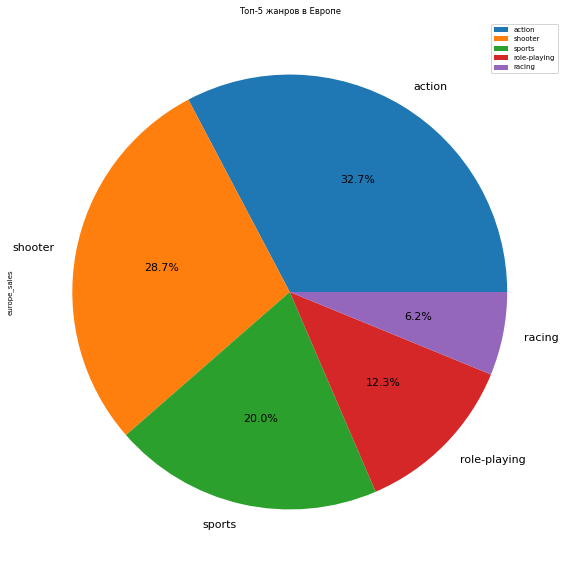

In [472]:
(
genre_europe
    .plot(y='europe_sales', grid=True, figsize=(10,10), kind='pie', 
          title='Топ-5 жанров в Европе', autopct='%1.1f%%', textprops={'fontsize': 11})

);

В топ-5 жанров в Европе входят action, shooter, sports, role-playing и misc. (я так понимаю Miscellaneous) со следующим процентным распределением популярности:

- shooter 32,7 %;
- action 28,7 %;
- sports 20,0 %;
- role-playing 12,3 %;
- racing. 6,2 %.

Причем, shooter, action, sports и role-playing одинаково популярны в Америке и Европе

In [473]:
genre_japan = last_years_sales_pivot.pivot_table(index='genre', 
                                                   aggfunc={'japan_sales':'sum'}).sort_values('japan_sales', 
                                                                                                      ascending=False).head()

In [474]:
genre_japan

,japan_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


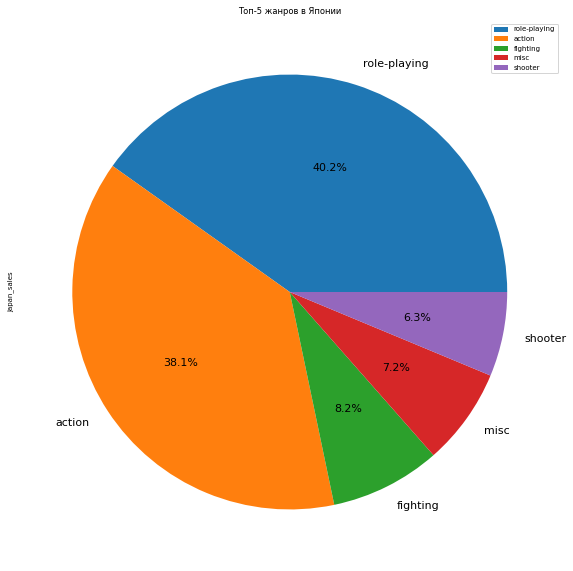

In [475]:
(
genre_japan
    .plot(y='japan_sales', grid=True, figsize=(10,10), kind='pie', 
          title='Топ-5 жанров в Японии', autopct='%1.1f%%', textprops={'fontsize': 11})

);

В топ-5 жанров в Японии входят action, shooter, sports, role-playing и misc. (я так понимаю Miscellaneous) со следующим процентным распределением популярности:

- role-playing 40,2 %;
- action 38,1 %;
- fighting 8,2 %
- misc 7,2 %;
- shooter 6,3 %;


Япония, очевидно, имеет другие интересы (другая культура и менталитет). В Японии не распространены соревновательные игры, больше играют в игры, где есть элемент сотрудничества и мирного сосуществования. Видеоигры в жанре action, все равно являются самыми популярными для вышерассмотренных регионов

### Влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинги в Америке

In [476]:
rating_america = last_years_sales_pivot.pivot_table(index='rating', 
                                                   aggfunc={'north_america_sales':'sum'}).reset_index()

In [477]:
rating_america

,rating,north_america_sales
0,E,50.74
1,E10+,33.23
2,M,96.42
3,T,38.95
4,unknown,64.72


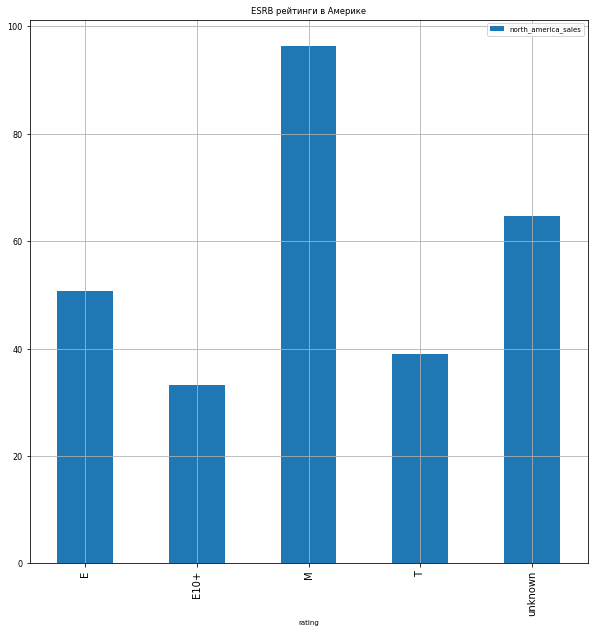

In [478]:
(
rating_america
    .plot(x='rating', y='north_america_sales', grid=True, figsize=(10,10), kind='bar', title='ESRB рейтинги в Америке')

)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8);

Рейтинги в Европе

In [479]:
rating_europe = last_years_sales_pivot.pivot_table(index='rating', 
                                                   aggfunc={'europe_sales':'sum'}).reset_index()

In [480]:
rating_europe

,rating,europe_sales
0,E,58.06
1,E10+,26.16
2,M,93.44
3,T,34.07
4,unknown,58.95


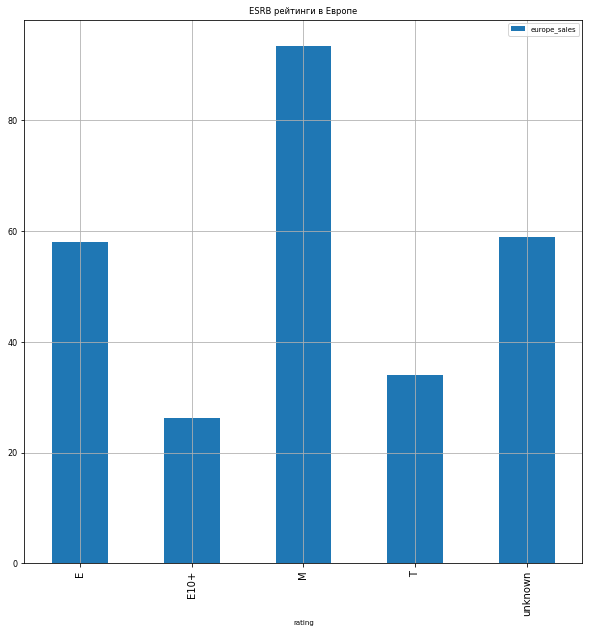

In [481]:
(
rating_europe
    .plot(x='rating', y='europe_sales', grid=True, figsize=(10,10), kind='bar', title='ESRB рейтинги в Европе')

)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8);

Рейтинги в Японии

In [482]:
rating_japan = last_years_sales_pivot.pivot_table(index='rating', 
                                                   aggfunc={'japan_sales':'sum'}).reset_index()

In [483]:
rating_japan

,rating,japan_sales
0,E,8.94
1,E10+,4.46
2,M,8.01
3,T,14.78
4,unknown,56.90


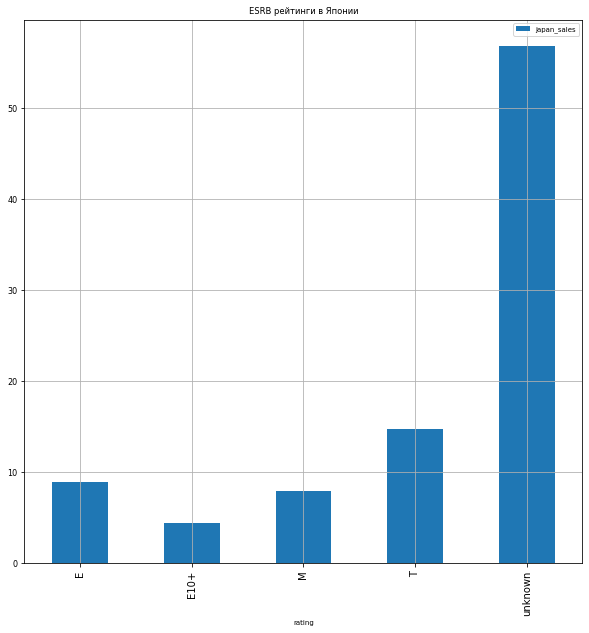

In [484]:
(
rating_japan
    .plot(x='rating', y='japan_sales', grid=True, figsize=(10,10), kind='bar', title='ESRB рейтинги в Японии')

)

plt.xticks(fontsize=10)
plt.yticks(fontsize=8);

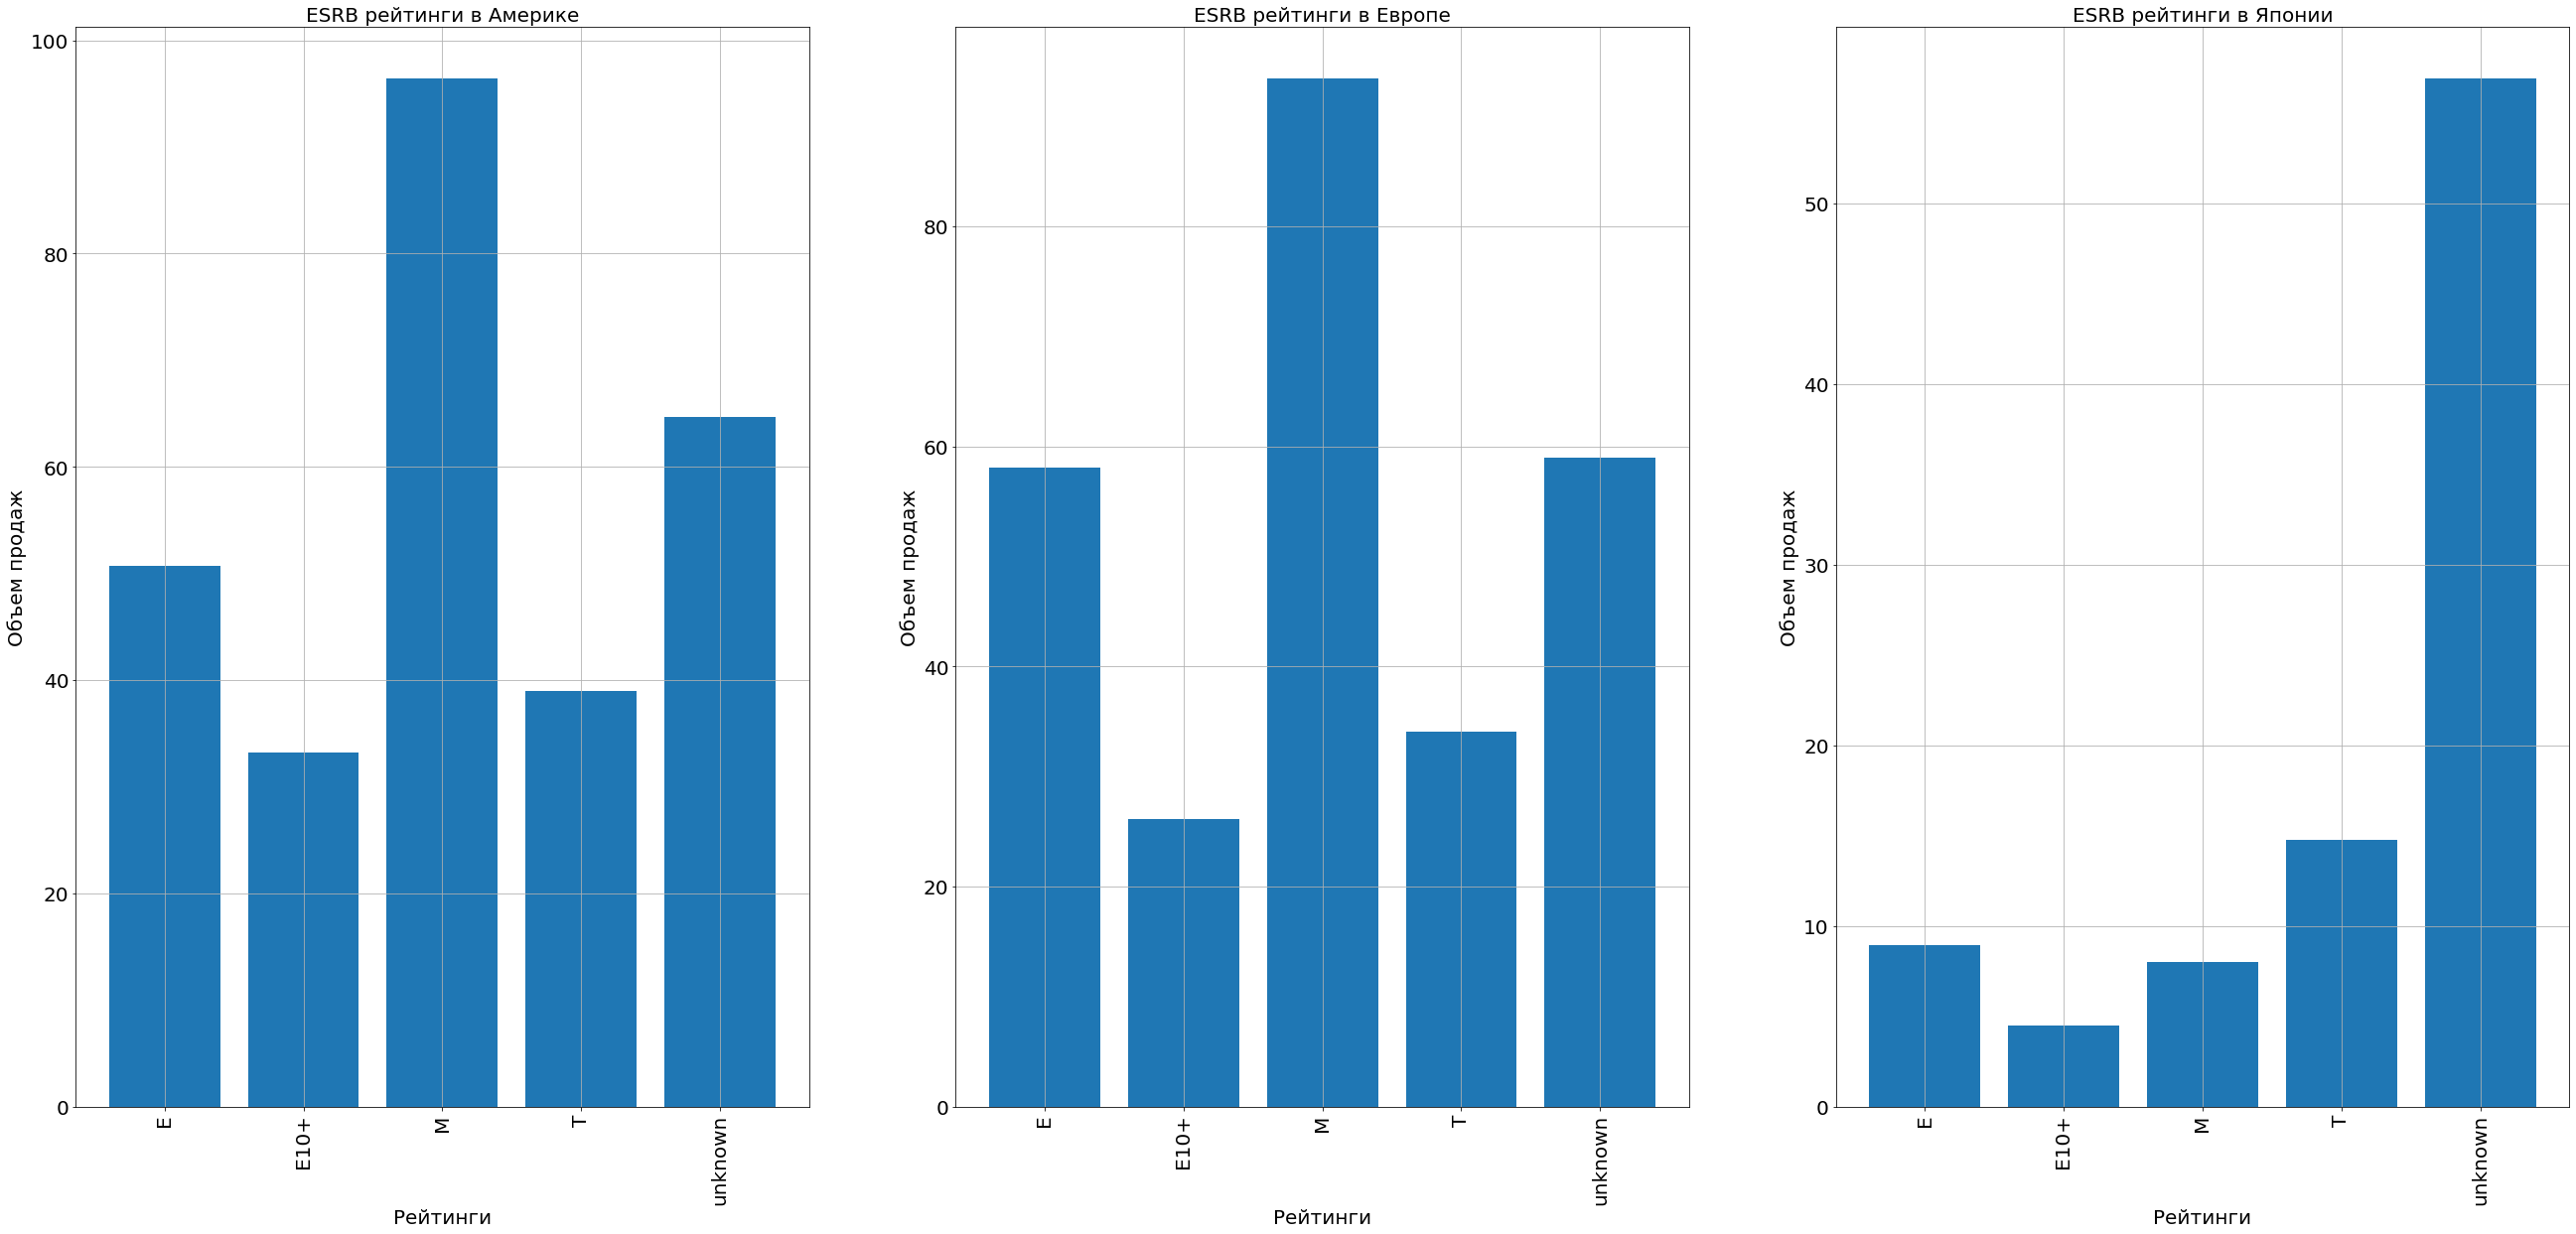

In [499]:
fig = plt.figure(figsize=(45,20))

x1 = rating_america['rating']
y1 = rating_america['north_america_sales']

x2 = rating_europe['rating']
y2 = rating_europe['europe_sales']

x3 = rating_japan['rating']
y3 = rating_japan['japan_sales']

   

ax1 = plt.subplot(1, 3, 1)
plt.bar(x1, y1)
ax1.set_title('ESRB рейтинги в Америке', fontsize=20)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)

ax2 = plt.subplot(1, 3, 2)
plt.bar(x2, y2)
ax2.set_title('ESRB рейтинги в Европе', fontsize=20)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)

ax3 = plt.subplot(1, 3, 3)
plt.bar(x3, y3)
ax3.set_title('ESRB рейтинги в Японии', fontsize=20)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=20)

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.set_xlabel('Рейтинги', fontsize=20)
    ax.set_ylabel('Объем продаж', fontsize=20)
    ax.grid();

Исходя из столбчатых диаграмм выше можно сделать следующие выводы:

1) Северная Америка: игры с рейтингом «M» («Mature») — «От 17 лет» занимают первое место в продажах. На втором месте идет  неопределенный рейтинг. Далее следует «E» («Everyone»). Примерно одинаковый показатель прожад для игр «E10+» и «T» («Для всех от 10 лет и старше» и «Подросткам»)\
2) Европа: игры с рейтингом «M» являются лидерами, за ними также игры с неопределенным рейтингом, затем «E». Разница между продажами для игр с рейтингом «E10+» и «T» незначительна. 

Вывод: первые два рассмотренных региона очень сильно похожи

3) Япония: на первом месте оказались игры с неопределенным жанром. На втором месте идет рейтинг «T», далее «E»,  «M» и «E10+». Япония здесь также имеет большие отличия по сравнению с Америкой и Европой

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулировка гипотез сводится к:
- нулевая - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые (user_score для XOne = user_score для PC)
- альтернативная - средние пользовательские рейтинги платформ Xbox One и PC неодинаковые (user_score для XOne ≠ user_score для PC)

alpha = 0.05. Eсли p-value окажется меньше него - отвергаем нулевую гипотезу

Не будем менять параметр equal_var на False ввиду того, что выборки достаточно большие

In [485]:
results = st.ttest_ind(
    last_three_years.loc[(~last_three_years['user_score'].isna()) & (last_three_years['platform'] == 'XOne')]['user_score'], 
    last_three_years.loc[(~last_three_years['user_score'].isna()) & (last_three_years['platform'] == 'PC')]['user_score'])

alpha = 0.05 #значение уровня значимости

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Полученное p-начение говорит о том, что нет оснований отвергать гипотезу о равенстве пользовательских рейтингов платформ XOne и PC одинаковые (user_score (mean) для XOne = user_score (mean) для PC). с вероятностью в почти 10 % такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между рейтингами.

### Средние пользовательские рейтинги жанров Action и Sports разные

Формулировка гипотез сводится к:

- нулевая - cредние пользовательские рейтинги жанров Action и Sports одинаковые
- альтернативная - средние пользовательские рейтинги жанров Action и Sports разные

In [486]:
results = st.ttest_ind(
    last_three_years[(~last_three_years['user_score'].isna()) & (last_three_years['genre'] == 'action')]['user_score'], 
    last_three_years.loc[(~last_three_years['user_score'].isna()) & (last_three_years['genre'] == 'sports')]['user_score'])

alpha = 0.05 #значение уровня значимости

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

2.8711147985105864e-19
Отвергаем нулевую гипотезу


Полученное p-начение говорит о том, что нет оснований принять гипотезу о равенстве рейтингов и необходимо рассмотреть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные (user_score (mean) для action ≠ user_score (mean) для sports)

## Общий вывод

Задачей проекта было определить факторы и закономерности, влияющие на успешность игры.

Первым этапом была проделана работа по предобработке данных. На данном этапе из таблицы были исключены пропуски в наименовании игры, жанре, годе выпуска. Пропуски в оценках пользователей/критиков в таблице были оставлены исходя из предположения, что в случае их заполнения существует риск искажения исследуемых данных (все таки оценка - сугубо субъективный показатель, и придумать ее может только ее ставящий). пропуски в рейтинге ESBR были заменены на unknown, так как ориентироваться не на что для их заполнения, во все игры с пропусками мы не играли, чтобы оценить допустимость той или иной возрастной категории.

Вторым этапом был проведен исследовательский анализ полученной таблицы.
1) проведена оценка количества выпущенных игр по годам, исходя из которой исходя из который было сделано предположение, что можно отсечь из рассмотрения года до 2001;\
2) были выбраны платформы с наиболее высокими показателями суммарных продаж (в которые попали 'DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360'). Для данных платформ выяснили, что платформы сменяются каждые 5 лет (уход старых занимает чуть больше времени);\
3) выбран период, который можно считать актуальным, а именно с 2014 года. далее именно для данного периода велась оценка показателей;\
4) платформами, которые растут в продажах, были названы PS4 и XOne;\
5) выявлено, что для платформ, входящих в топ, существуют игры, которые продаются в таком количестве, что сильно выбиваются, и делают единично высокие продажи: например для платформ 3DS, PS4, XOne. По стабильности можно выделить PS4, Wii/WiiU, X360/XOne;\
6) выявлено, что оценки критиков/пользователей не оказывают влияние на успех игры;\
7) рассмотрено общее распределение популярности жанров: наибольшую долю продаж занимают игры жанра action и shooter, но продаваемость action обсусловлена единичными "хитами". Среди устойчивых после shooter'ов следует выделять sports, platform и fighting;\
8) были составлены портреты пользователя каждого региона: рынки Северной Америки и Европы очень похожи по предпочтениям в жанрах и рейтингах ESBR, так и по использованию платформ. Рынок Японии иеет очень большие различия с вышеупомянутыми, и для него действуют другие правила, определяющие успешность игры.\
9) были проверены гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Полученные p-значения, говорят что 
- отвергать нулевую гипотезу о том, пользовательские оценки Xbox One и PC одинаковые, оснований нет.
- гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые может быть отвергнута